## <span style="color:purple"> **지하철 월클역을 찾아보자! -  중심성 개념을 통한 수도권 지하철 네트워크 분석 및 활용 방안 제언**



들어가며





**“시민의 발”**, 우리는 지하철을 흔히들 이렇게 부르곤 합니다. 지하철은 그 별명에 걸맞게, 도시 대중교통 시스템에서 없어서는 안 될 존재입니다. 수도권에서는 전체 23개의 도시철도 노선이 개통되어 있으며(2021.08.22. 기준, 네이버 지하철 노선도 참고), 서울교통공사와 코레일의 “수송실적” 자료에 따르면 코로나 이전인 2019년 한 해 동안 약 35억 명이 넘는 사람들이 수도권 지하철을 이용하였습니다. 이렇듯 지하철은 정말 핵심적인 대중교통 수단입니다. 오죽하면 “경기도 살면 지하철에서 인생의 20%를 보낸다”는 자조 섞인 농담까지 유행할 정도일까요?




저희는 이러한 지하철 시스템을 하나의 큰 네트워크로 바라보았고, 이에 중심성 개념을 활용하여 지하철에 대해 새롭게 연구하였습니다. 각 역의 중심성을 구하여 중심성 값에 따른 **<u>“월클역(World Class역 – 영향력이 높고 네트워크에서 중점적인 역할을 수행하는 역)”</u>**을 찾아보았습니다. 월클역을 중심으로 여러 데이터에 관해 시각화 작업을 거쳤으며, 중심성 패턴을 분석하고 그러한 패턴이 나타난 이유에 대해 분석해 보았습니다. 또한 이러한 연구 방법과 결과를 바탕으로 정책 방향 및 추후 응용 방법, 후행 연구 등에 관하여 제언하였습니다. 
    

    
***


**태블로 링크와 함께 봐주세요!

https://public.tableau.com/shared/2NCJFPXMF?:display_count=n&:origin=viz_share_link

### <span style="color:GREEN"> 목차
    
      
      
* 1.	**서론**
    + (가)	주제 선정 배경
    + (나)	연구 목표
      
      
    
* 2.	**본론**
    + (가)	데이터 수집 및 여러 중심성 개념
    + (나)	각 지하철역의 중심성 분석 및 시각화
    + (다)	지하철 네트워크의 특성 분석
      
      
    
* 3.	**결론**
    + (가)	연구 활용 방안 제언 – 지하철 자체적인 활용 방안
    + (나)	연구 활용 방안 제언 – 사회 전체적 활용 방안
    + (다)	마무리하며
    
***


### <span style="color:GREEN">주제 선정 배경 

-	“서울시 1일 교통수단별 통행현황 (분담률) 통계”에 따르면 2019년 전체 교통수단 중 **지하철/철도의 분담률은 41.6%**에 달하는데, 이는 **승용차(24.5%), 버스(24%)** 등과 비교했을 때 월등하게 높은 수치입니다. 따라서 지하철을 분석하는 것이 가장 효과적인 분석이 될 것이라 판단하였습니다.  
    
    

    
-  수도권 광역 도시철도는 서울 근교뿐 아니라 충남 아산시(1호선 신창역), 경기 파주시(경의중앙선 임진강역), 강원 춘천시(경춘선 춘천역)까지 연결되어 있기 때문에 다른 대중교통 수단에 비하여 훨씬 광범위한 분석이 가능할 것이라 판단하였습니다. 
    
    
    
    

-	이에, 도시의 인구통계학적 특성을 가장 잘 반영할 수 있는 **지하철**을 연구 대상으로 선택하였으며, 지하철 분석을 통하여 사회의 다양한 분야의 여러 정책을 제언하고자 하였습니다. 


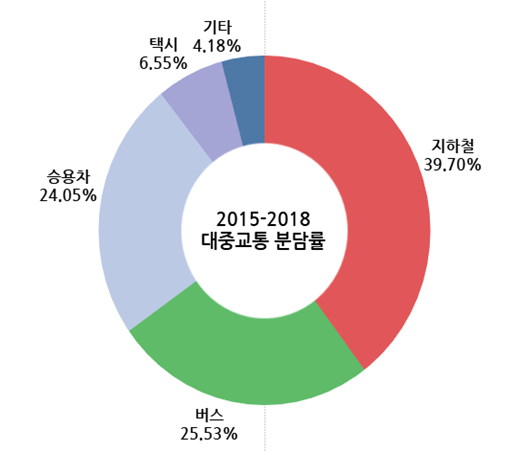

[1] 451 509   4

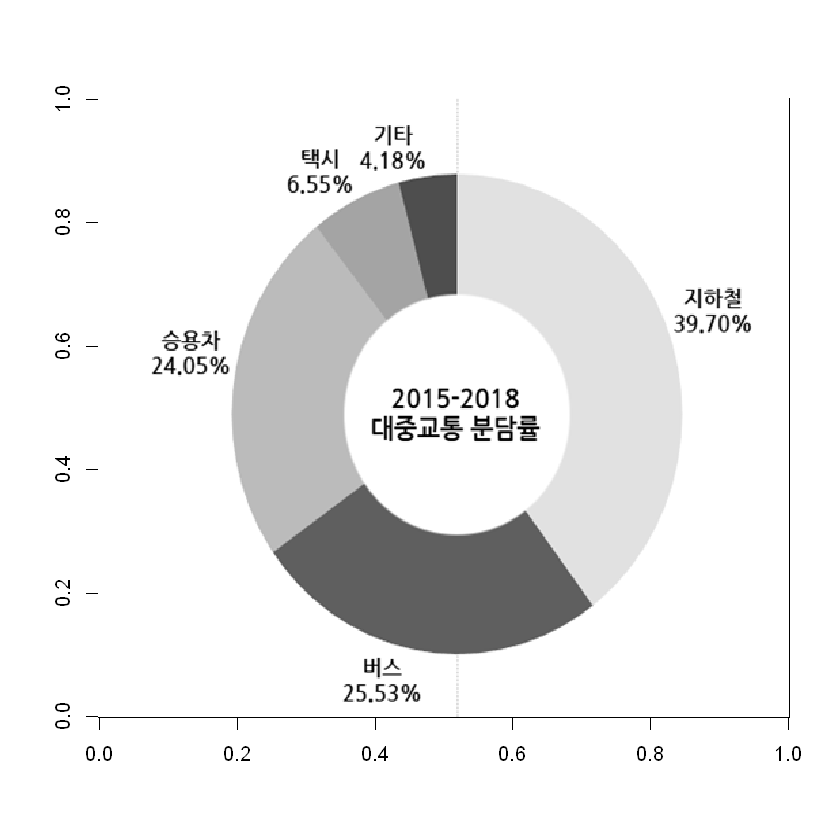

In [3]:
pic_1 <- readPNG('분담률.png')
dim(pic_1)
#결과값 : 이미지 픽셀수, 이미지 픽셀수, 차원(컬러레이어의 수)

#첫번째 컬러레이만 추출해 행렬을 만든후 R의 image()함수를 이용하여 plots창에 띄운다.
pic_2 <- pic_1[,,1]
image(t(pic_2)[,nrow(pic_2):1], col=grey(seq(0,1,length.out=600)))


### <span style="color:GREEN">연구 목표 
    
    
-	지하철역에 대한 분석은 대부분 **승객의 숫자**에 초점을 맞추어 이루어집니다. 서울교통공사, 한국철도공사 등에서는 승객 수, 수송량 등 1차적인 자료가 제공되고 있으며, 지하철 광고 단가 등을 선정할 때에도 **승하차 수**가 대표적으로 고려되곤 합니다. 
    
    
-	그러나 저희는, 지하철을 단순히 노드(node)들의 집합으로 바라보는 것이 아니라, 거대한 하나의 **사회 연결망(network)**으로 바라보고자 합니다. 이는 각각의 지하철역들이 서로 영향을 주기 때문입니다.
    
    
    
-	예를 들어, 한 역에서 문제가 발생한다면, 그 역만 문제가 발생하고 다른 역들은 전부 아무 영향을 받지 않는 것이 아니라, 한 역에서 사고가 난다면 그 호선 전체가 영향을 받게 됩니다. 또한 저희는 일상생활에서 어떠한 역을 찾아갈 때 그 역이 어느 호선인지를 고려한 다음 경로를 결정합니다. 이러한 특성들은 전부 지하철이 하나의 네트워크이기 때문에 나타나는 현상입니다. 
    
    
    
-	따라서 저희는, 승하차수에만 집중하지 않고, 중심성 개념을 도입하여 **“지하철 네트워크”**를 분석할 것입니다. 승하차 인원수의 순위와 중심성 순위를 비교하고, 중심성 순위가 나타난 특성을 추론하고, 나타난 결과 등을 바탕으로 여러 정책을 제언할 것입니다. 
    
    ***


In [122]:
#분석 및 시각화에 필요한 라이브러리 불러오기
library(dplyr)
library(ggplot2)
library(ggraph)
library(tidygraph)
library(sna)
library(igraph)
library(png)
library(rmarkdown)
library(knitr)

-	일상적으로 가장 자주 활용되면서 일반 대중에게 가장 익숙한 개념인 **승객의 숫자**는 **“연결 중심성(Degree Centrality)”**에 해당합니다. 이는 연결되어 있는 노드의 숫자만 파악하는 것이기 때문에, 지하철 네트워크에서는 각 역의 승객수로 치환됩니다. 




-	저희는 연결 중심성 외에 추가적으로, **“고유벡터 중심성(Eigenvector Centrality)”**과 **“매개 중심성(Betweenness Centrality)”** 이라는 개념을 도입하여 분석을 진행하였습니다. 




- “고유벡터 중심성”이란, **다른 노드의 중심성을 반영하여 중요한 노드와의 연결이 많을수록 중요한 노드라고 판단하는 개념**을 말합니다. 이는 어떠한 역이 다른 중요한 역들과 얼마나 강하게 연결되었는지에 대해 설명해줄 수 있습니다. 


-	매개 중심성은, **무작위의 두 노드 사이의 최단거리에 특정 노드가 포함되는 빈도나 정도를 나타내는 개념**을 말합니다. 이는, 특정 역이 지리적으로 얼마나 중요한지에 관한 정보를 제공해줄 수 있습니다. 어떠한 무작위의 두 역 사이의 최단거리를 구할 때 특정 역이 자주 포함된다는 것은 곧 지하철 네트워크 속에서 그 역이 지리적으로 중요한 위치를 차지한다는 것을 의미하기 때문입니다. 


<span style="color:red"> <u> 한 역이 다른 중요한 역과 얼마나 강하게 연결되었는지, 그리고 한 역이 지리적으로 얼마나 중요한지 모두 중요한 특성이라고 사료되기 때문에, 저희는 두 값을 모두 고려하기로 하였습니다. 이에 고유벡터 중심성 값과 매개 중심성 값을 구한 다음, 두 값의 1등을 전부 1000으로 맞추는 일종의 표준화를 할 것입니다. 그 후, 두 수치를 곱하여 중심성 수치를 구하고 이를 승객 수의 순위와 비교하고 그 특성을 분석할 것입니다.</u>
   
 ***


'data.frame':	589 obs. of  3 variables:
 $ line : chr  "1호선" "1호선" "1호선" "1호선" ...
 $ name : chr  "서울역(1)" "시청(1)" "종각" "종로3가(1)" ...
 $ month: num  4445031 1505395 2596955 2004830 1570189 ...


,line,name,month
,<chr>,<chr>,<dbl>
1,1호선,서울역(1),4445031
2,1호선,시청(1),1505395
3,1호선,종각,2596955
4,1호선,종로3가(1),2004830
5,1호선,종로5가(1),1570189
6,1호선,동대문(1),972619


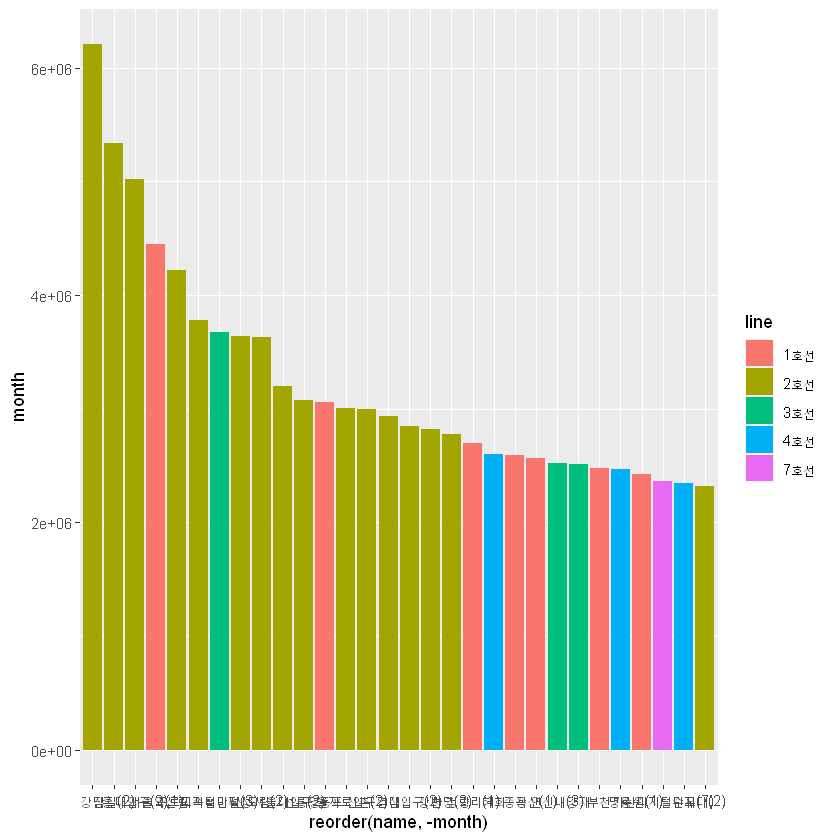

In [123]:
#subway.csv 를 subway라는 변수로 불러오기

subway <- read.csv('subway.csv')
str(subway)
head(subway)

#subway파일은 호선 정보가 포함된 월별 승하차 데이터

subway <- subway %>% arrange(desc(month))
sub10 <- head(subway,30)
ggplot(sub10, aes(x= reorder(name, -month), y= month, fill = line))+
  geom_bar(stat = "identity")

#2호선의 비율이 꽤 높은 것을 확인할 수 있습니다.

'data.frame':	30 obs. of  3 variables:
 $ name     : chr  "서울역" "홍대입구" "잠실" "강남" ...
 $ passenger: num  7592040 6763467 6321611 6210060 5927148 ...
 $ transfer : int  1 1 1 1 1 1 1 1 0 1 ...


[1] 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 0 1 0 1 1 0 1 1 0 0 1 1 1 1 1

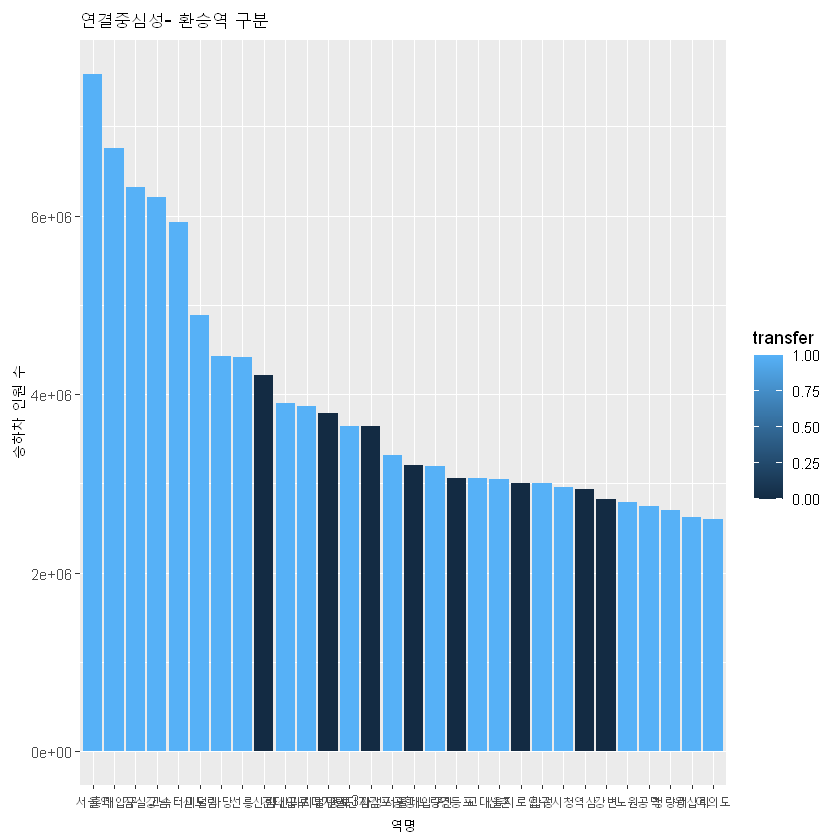

In [124]:
#상위 20개 역에 직접 환승여부 정보를 추가한 데이터를 불러온 후, 막대그래프를 그려줍니다. 
transfer <- read.csv('transfer_subway.csv')
str(transfer)
as.integer(transfer$transfer)

transfer <- head(transfer %>% arrange(desc(transfer)), 30)


ggplot(transfer, aes(x= reorder(name, -passenger), y = passenger, fill = transfer)) + 
  geom_bar(stat = "identity") +
  ggtitle("연결중심성- 환승역 구분") +
  xlab("역명") +
  ylab("승하차 인원 수")
#승하차 인원 수가 높은 상위 30개의 역 중, 8개의 역을 제외한 22개의 역이 모두 환승역임을 확인할 수 있습니다. 

In [125]:
#metro.csv 를 metro라는 변수로 불러오기
#중심성 개념을 도입하기 위해서 from/to/total 데이터를 불러옵니다. 

metro <- read.csv('metro.csv')
str(metro)
head(metro, 10)
tail(metro,10)

'data.frame':	311042 obs. of  3 variables:
 $ from : chr  "가능" "가능" "가능" "가능" ...
 $ to   : chr  "가락시장" "가산디지털단지" "가양" "가재울" ...
 $ total: int  103 593 102 1 2 5 14 34 104 35 ...


,from,to,total
,<chr>,<chr>,<int>
1,가능,가락시장,103
2,가능,가산디지털단지,593
3,가능,가양,102
4,가능,가재울,1
5,가능,가정,2
6,가능,가정중앙시장,5
7,가능,가좌,14
8,가능,가천대,34
9,가능,가평,104


,from,to,total
,<chr>,<chr>,<int>
311033,흥선,홍제,2
311034,흥선,화곡,7
311035,흥선,화랑대,4
311036,흥선,화서,1
311037,흥선,회기,169
311038,흥선,회룡,7012
311039,흥선,회현,39
311040,흥선,효자,1171
311041,흥선,효창공원앞,1


In [126]:
#승하차 인원 수
passenger <- read.csv('passenger.csv')
head(passenger,20)

,name,passenger
,<chr>,<int>
1,서울,7592040
2,시청,2963578
3,종각,2596955
4,종로3가,3645411
5,종로5가,1570189
6,동대문,972619
7,신설동,1232740
8,제기동,1259844
9,청량리,2696763


<span style="color:GREEN"> **승하차 인원 수가 많은, 즉 연결중심성이 높은 상위 20개 역들은 우리의 상식과 유사합니다.**

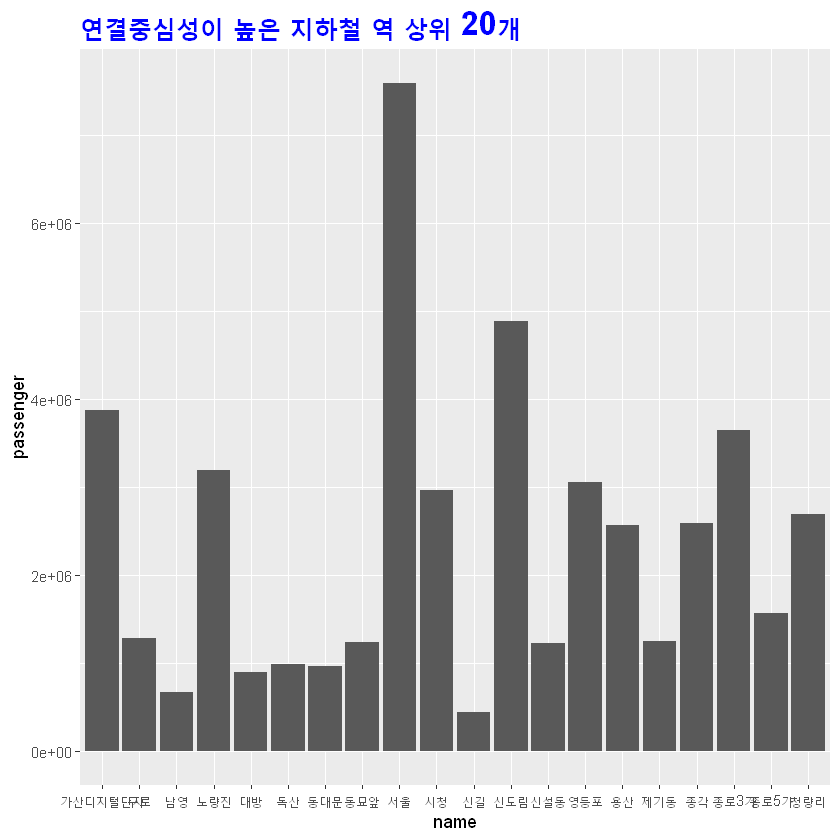

In [127]:
ggplot(head(passenger,20), aes(x=name, y = passenger)) + geom_bar(stat = "identity")+
labs(title = '연결중심성이 높은 지하철 역 상위 20개')+
theme(plot.title=element_text(size=20, color="blue", face = "bold"))

*가시적인 시각화를 위해 태블로를 활용하여 나타냈습니다

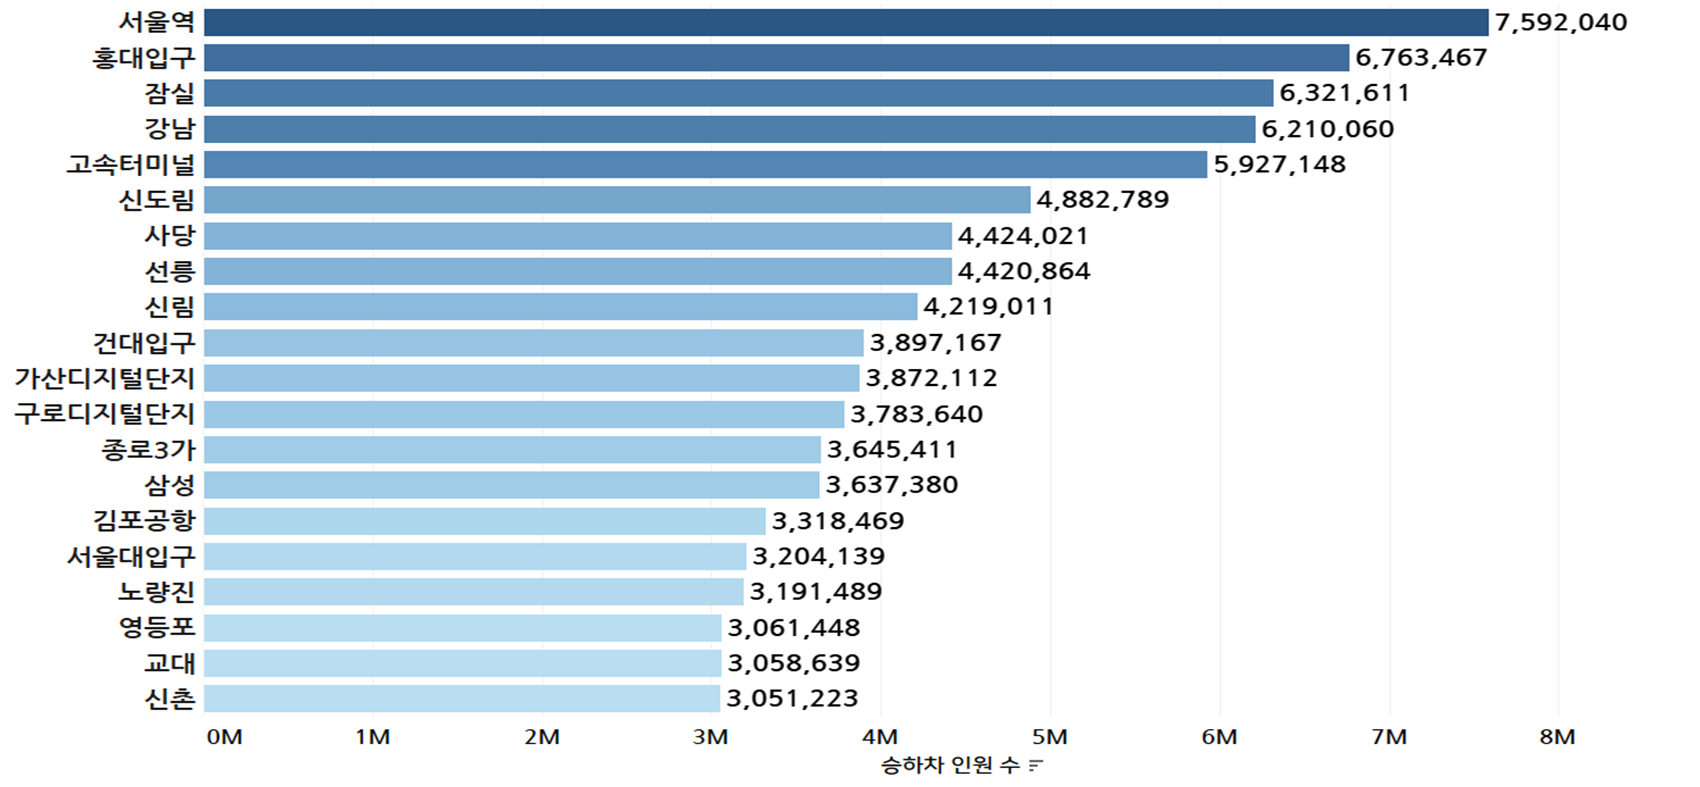

[1]  787 1700    4

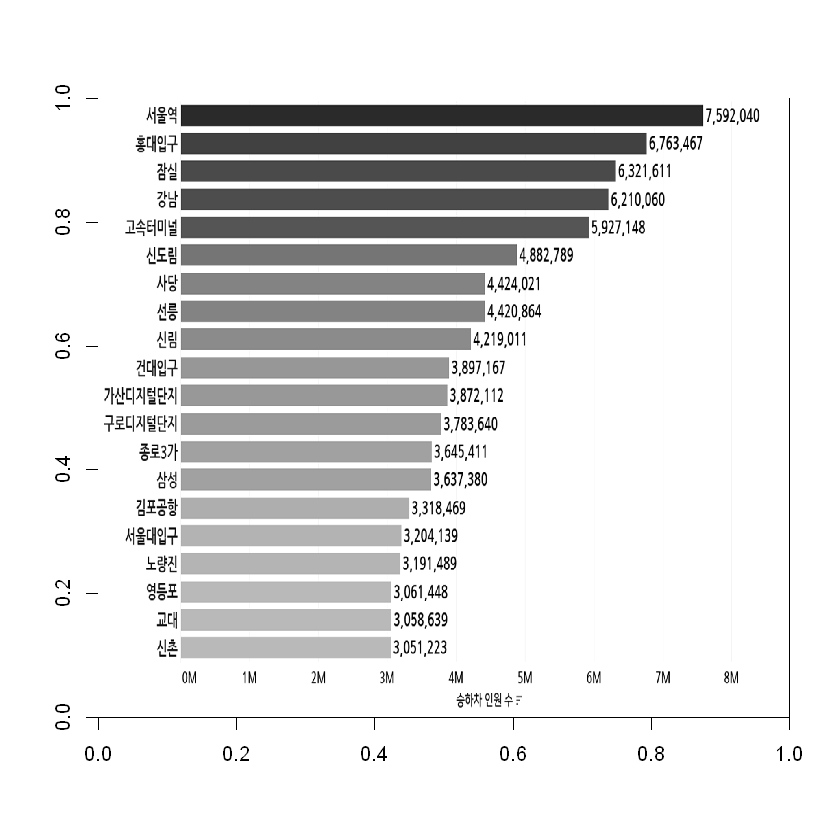

In [7]:
pic_1 <- readPNG('연결중심성 상위20개.png')
dim(pic_1)
pic_2 <- pic_1[,,1]
image(t(pic_2)[,nrow(pic_2):1], col=grey(seq(0,1,length.out=600)))

<span style="color:GREEN"> **R을 활용하여, 고유벡터 중심성, 매개중심성, 페이지랭크 등의 다양한 중심성을 도출해보았습니다.** 

In [128]:
#eigenvector centrality

eig <- metro %>% as_tbl_graph() %>%
  mutate(eig = centrality_eigen(weights = total)) %>%
  as_tibble %>%
  arrange(desc(eig))

eig

name,eig
<chr>,<dbl>
강남,1.0000000
잠실,0.7947899
신림,0.6203845
사당,0.5647993
삼성,0.5615423
서울대입구,0.5123541
홍대입구,0.4970751
선릉,0.4950876
구로디지털단지,0.4873888


In [129]:
#고유벡터 중심성 값은 1등이 1.0을 가지므로, 효과적인 분석을 위해 1000을 곱해서 1등의 값을 1000으로 맞춰줍니다.
##이에 맞춰 다른 중심성 값들도 1등을 1,000으로 정규화합니다. 

eigen <-eig %>%
  mutate(eigenvector = round(eig * 1000 , 2)) %>%
  select(name , eigenvector)

eigen


name,eigenvector
<chr>,<dbl>
강남,1000.00
잠실,794.79
신림,620.38
사당,564.80
삼성,561.54
서울대입구,512.35
홍대입구,497.08
선릉,495.09
구로디지털단지,487.39


In [130]:
#데이터 프레임 형식으로 변환
eigen_subway <- as.data.frame(eigen)
eigen_subway

name,eigenvector
<chr>,<dbl>
강남,1000.00
잠실,794.79
신림,620.38
사당,564.80
삼성,561.54
서울대입구,512.35
홍대입구,497.08
선릉,495.09
구로디지털단지,487.39


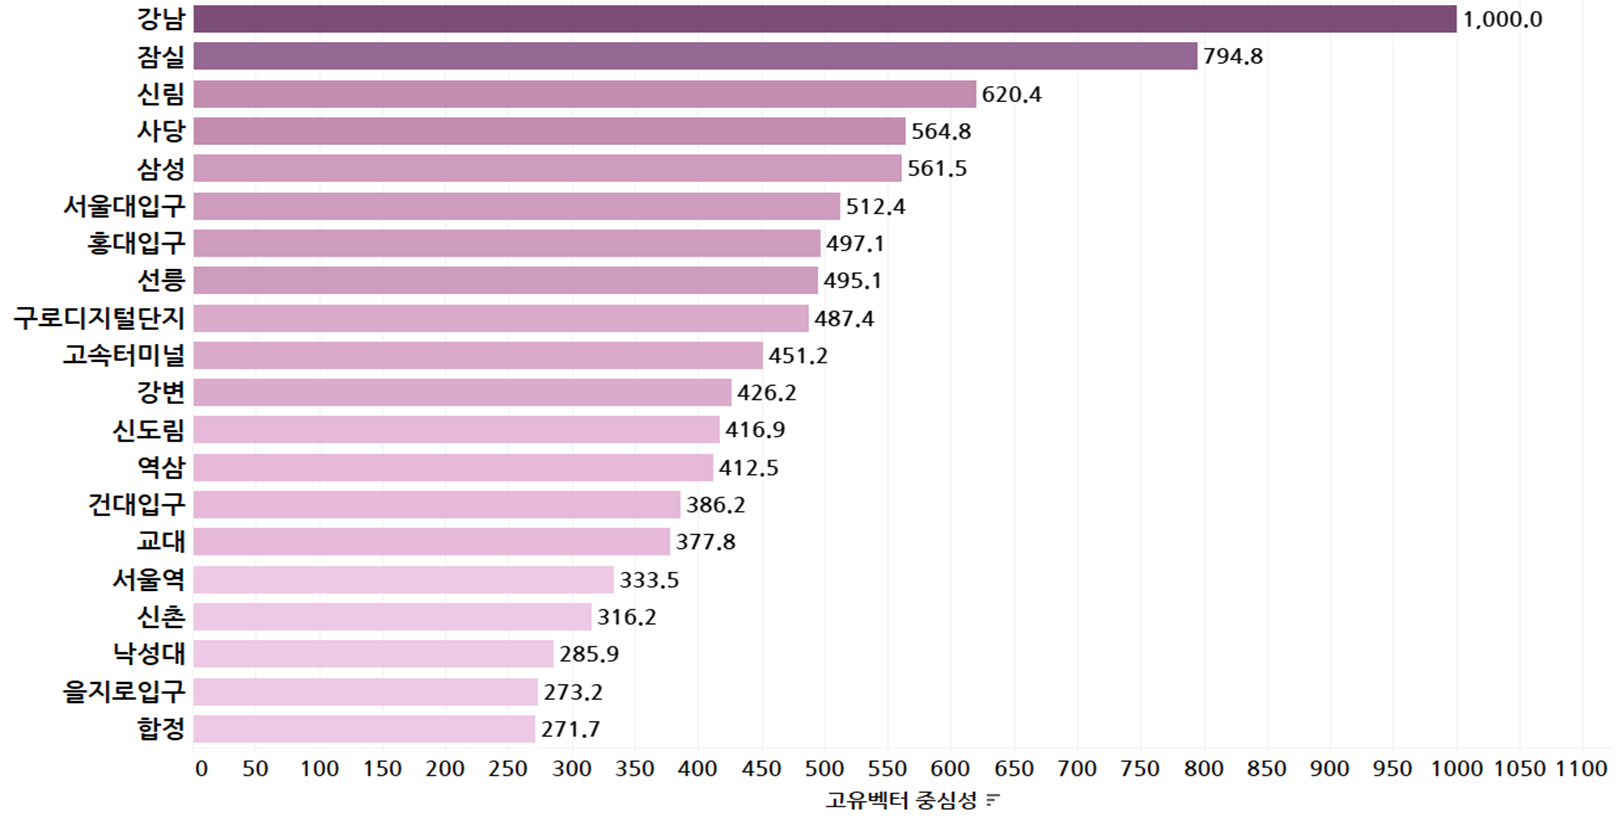


[1]  821 1623    4

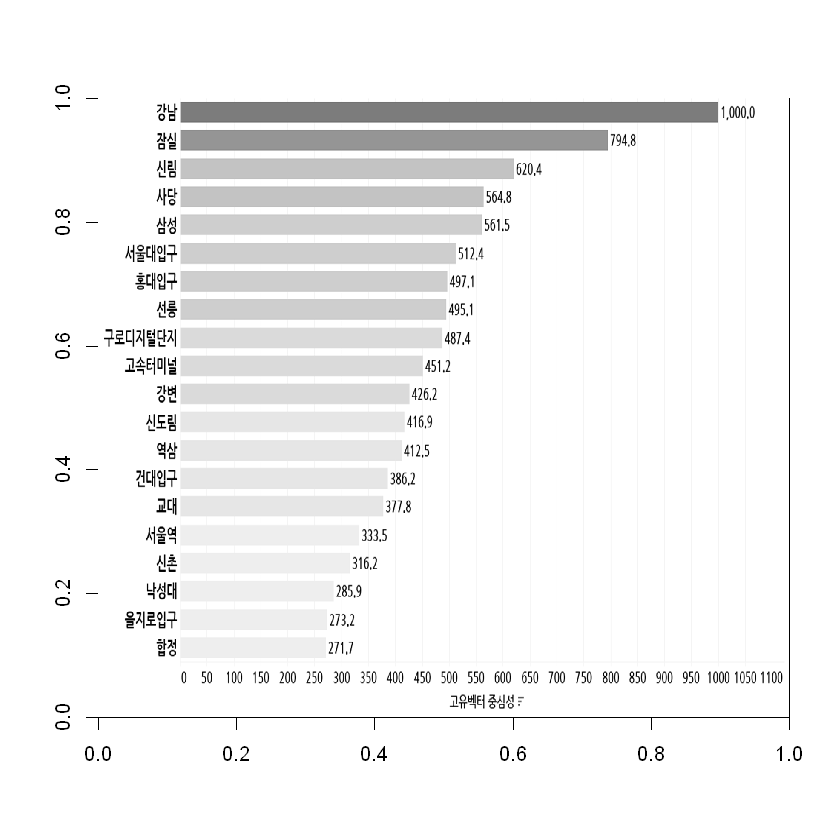

In [8]:
pic_1 <- readPNG('고유벡터 상위 20개.png')
dim(pic_1)
pic_2 <- pic_1[,,1]
image(t(pic_2)[,nrow(pic_2):1], col=grey(seq(0,1,length.out=600)))

-	<span style="color:GREEN"> **이 그래프는 고유벡터 중심성 값이 큰 상위 20개의 역을 나타낸 자료입니다. 강남이 압도적인 1위를 하며, 앞선 그래프의 순위와는 확연한 차이가 있음을 알 수 있습니다.**

In [131]:
#betweenness centrality

btw <- metro %>% as_tbl_graph() %>%
  mutate(btw = centrality_betweenness()) %>%
  as_tibble %>%
  arrange(desc(btw))
#1000으로 정규화
btw<- btw %>%
  mutate(betweeness = round(btw/63.19026*1000 , 2)) %>%
  select(name , betweeness)


In [132]:
#데이터 프레임 형식으로 변환
btw_subway <- as.data.frame(btw)

-	<span style="color:GREEN"> **매개 중심성 값입니다.** 
-	<span style="color:GREEN"> **매개 중심성 값의 차이는 매우 근소하다는 것을 알 수 있었으며, 순위 역시 연결 중심성, 고유벡터 중심성과 모두 차이를 보입니다.**

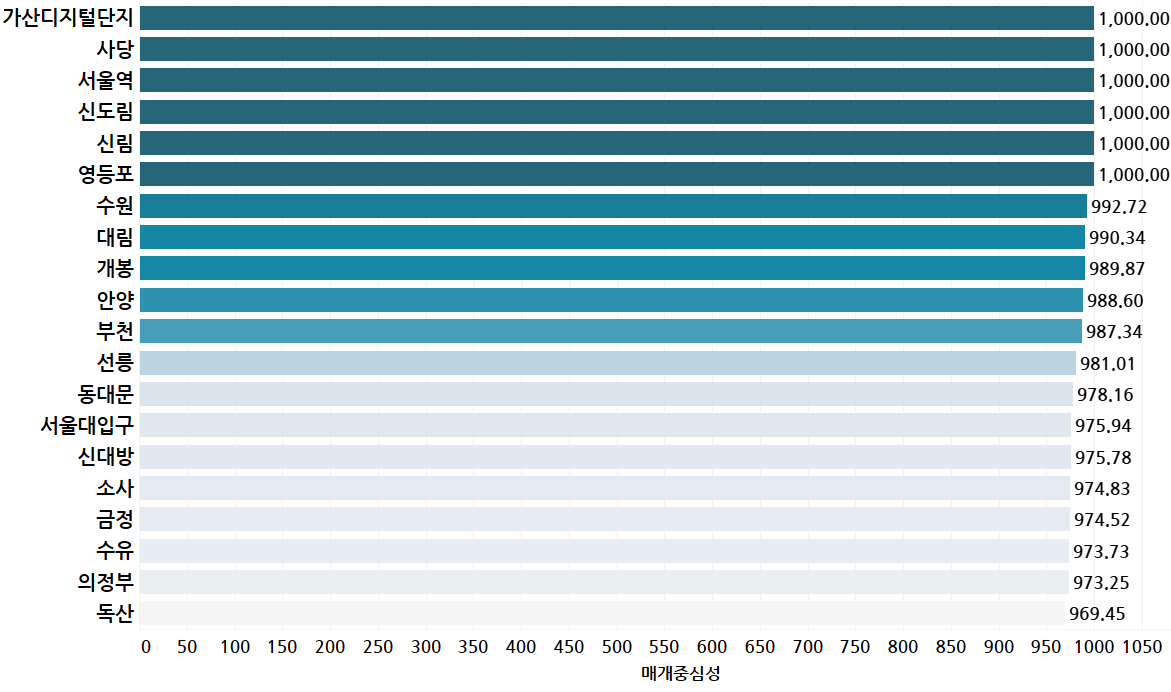

[1]  692 1171    4

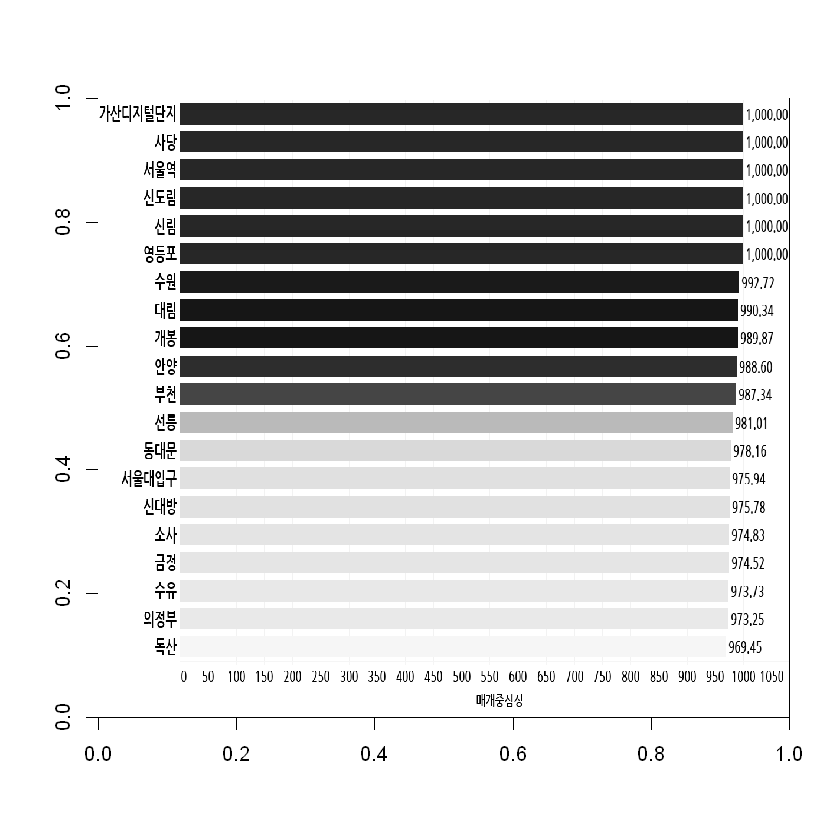

In [12]:
pic_1 <- readPNG('매개 상위 20개.png')
dim(pic_1)
pic_2 <- pic_1[,,1]
image(t(pic_2)[,nrow(pic_2):1], col=grey(seq(0,1,length.out=600)))

-	매개 중심성과 함께, **“페이지랭크(page rank)”**라는 개념도 활용해보았습니다. 페이지랭크는 웹사이트의 순위를 정할 때 활용되는데, 다른 웹사이트에 활용되는 빈도를 측정하면서도 한 사이트가 다른 중요한 사이트에 얼마나 자주 참조되었는지를 분석하는 척도입니다. 이 페이지랭크 개념 역시 지하철 네트워크에 활용될 여지가 있을 수 있다고 판단하여 한번 분석해보았습니다. 

In [133]:
#pagerank centrality

pg <- metro %>% as_tbl_graph() %>%
  mutate(pagerank = centrality_pagerank(weights = total)) %>%
  as_tibble %>%
  arrange(desc(pagerank))
pg

name,pagerank
<chr>,<dbl>
강남,0.013610434
고속터미널,0.010648969
잠실,0.010488594
홍대입구,0.010395313
서울역,0.009233606
사당,0.007525885
신림,0.007215341
건대입구,0.007110708
신도림,0.007009644


In [134]:
#pagerank 값이 적기 때문에 1000을 곱해서 크게 보기
pagerank <- pg %>%
  mutate(pagerank = round(pagerank * 1000 , 2)) %>%
  select(name , pagerank)
#1등이 1000이 되도록 정규화 

pagerank <- pagerank %>%
  mutate(pagerank = round(pagerank/13.61*1000 , 2)) %>%
  select(name , pagerank)

In [135]:
#데이터 프레임 형식으로 변환
pr_subway <- as.data.frame(pagerank)

In [136]:
head(eigen_subway,20)
head(btw_subway, 20)
head(pr_subway, 20)

,name,eigenvector
,<chr>,<dbl>
1,강남,1000.00
2,잠실,794.79
3,신림,620.38
4,사당,564.80
5,삼성,561.54
6,서울대입구,512.35
7,홍대입구,497.08
8,선릉,495.09
9,구로디지털단지,487.39


,name,betweeness
,<chr>,<dbl>
1,가산디지털단지,1000.00
2,사당,1000.00
3,서울역,1000.00
4,신도림,1000.00
5,신림,1000.00
6,영등포,1000.00
7,수원,992.76
8,대림,990.37
9,개봉,989.84


,name,pagerank
,<chr>,<dbl>
1,강남,1000.00
2,고속터미널,782.51
3,잠실,770.76
4,홍대입구,764.14
5,서울역,678.18
6,사당,553.27
7,신림,530.49
8,건대입구,522.41
9,신도림,515.06


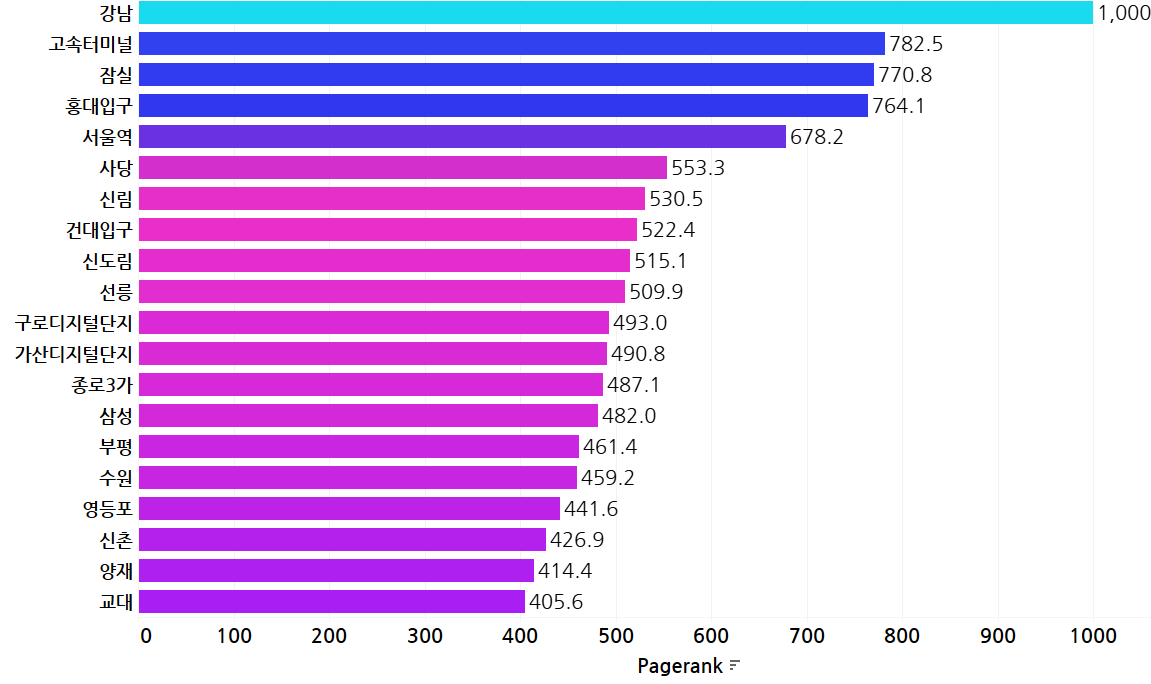

[1]  684 1151    4

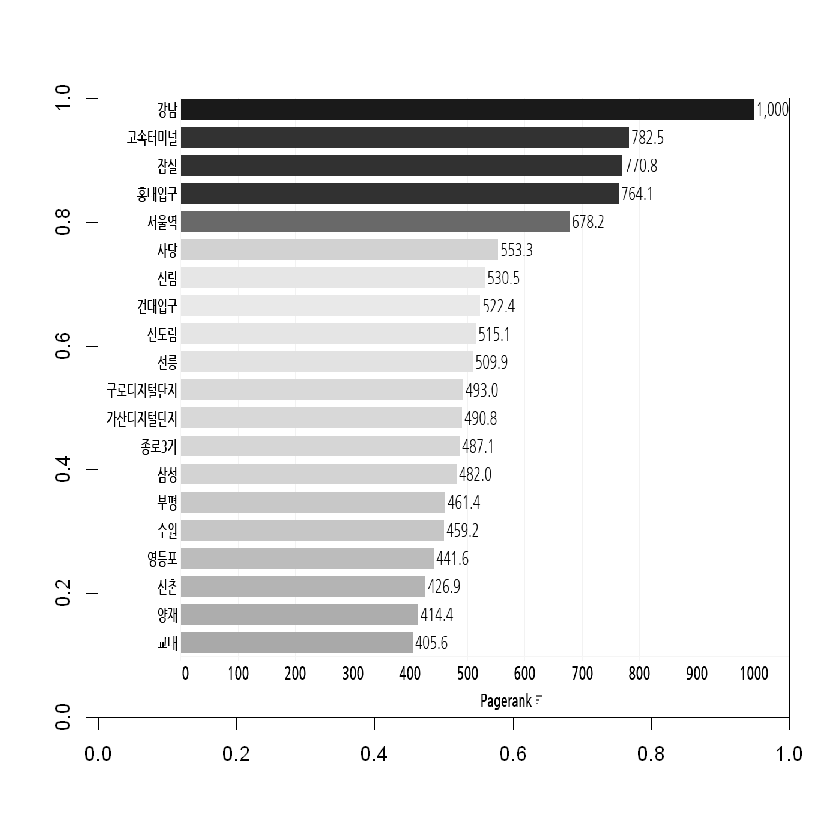

In [13]:
pic_1 <- readPNG('페이지랭크 상위20개.png')
dim(pic_1)
pic_2 <- pic_1[,,1]
image(t(pic_2)[,nrow(pic_2):1], col=grey(seq(0,1,length.out=600)))

-	그림을 보면 알 수 있듯, **페이지랭크는 고유벡터 중심성과 유사한 모습**을 보이는 것으로 판단되었고, 매개 중심성과 큰 상관 관계나 비례 관계 등은 없는 것으로 판단되었습니다.

In [137]:
#각 중심성 값의 상위 20개의 순위를 보여줍니다.
head(cbind(eigen_subway, btw_subway,pr_subway),20)

,name,eigenvector,name,betweeness,name,pagerank
,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
1,강남,1000.00,가산디지털단지,1000.00,강남,1000.00
2,잠실,794.79,사당,1000.00,고속터미널,782.51
3,신림,620.38,서울역,1000.00,잠실,770.76
4,사당,564.80,신도림,1000.00,홍대입구,764.14
5,삼성,561.54,신림,1000.00,서울역,678.18
6,서울대입구,512.35,영등포,1000.00,사당,553.27
7,홍대입구,497.08,수원,992.76,신림,530.49
8,선릉,495.09,대림,990.37,건대입구,522.41
9,구로디지털단지,487.39,개봉,989.84,신도림,515.06


In [138]:
#역을 기준으로, 각 역들의 중심성 값을 합쳐줍니다.
eigen_btw <- left_join(eigen_subway,btw_subway,by ='name') #매개중심성과 고유벡터 중심성
subway_final<- left_join(eigen_btw, pr_subway, by = 'name') #페이지랭크 추가
subway_final<- left_join(subway_final, passenger, by = 'name') #승하차 인원 수 추가
subway_final

name,eigenvector,betweeness,pagerank,passenger
<chr>,<dbl>,<dbl>,<dbl>,<int>
강남,1000.00,962.02,1000.00,6210060
잠실,794.79,964.30,770.76,6321611
신림,620.38,1000.00,530.49,4219011
사당,564.80,1000.00,553.27,4424021
삼성,561.54,911.49,482.00,3637380
서울대입구,512.35,975.98,403.38,3204139
홍대입구,497.08,964.30,764.14,6763467
선릉,495.09,981.08,509.92,4420864
구로디지털단지,487.39,965.38,493.02,3783640


In [139]:
#위경도 값을 join 시켜줍니다.
##subway_final은 578개의 행을 가지고 있고, 위경도 자료의 행은 589개가 있으므로, 역 이름을 key값으로 join 즉, merge시켜줍니다. 
lat_long <- read.csv('subway_coo.csv')
str(lat_long)

'data.frame':	589 obs. of  3 variables:
 $ name     : chr  "가락시장" "419민주묘지" "가능" "가산디지털단지" ...
 $ latitude : num  37.5 37.6 37.7 37.5 37.6 ...
 $ longitude: num  127 127 127 127 127 ...


In [140]:
subwaydata<-left_join(subway_final, lat_long, class ='name')
subwaydata
#결측치가 보이는데, 대다수의 것들은 역 이름이 바뀐 것이 반영되지 않은 것입니다. 혹은 신설역등이 있습니다. ex)신천 -> 잠실새내 

Joining, by = "name"



name,eigenvector,betweeness,pagerank,passenger,latitude,longitude
<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
강남,1000.00,962.02,1000.00,6210060,37.49717,127.0279
잠실,794.79,964.30,770.76,6321611,37.51395,127.1022
신림,620.38,1000.00,530.49,4219011,37.48420,126.9297
사당,564.80,1000.00,553.27,4424021,37.47653,126.9817
삼성,561.54,911.49,482.00,3637380,37.50884,127.0632
서울대입구,512.35,975.98,403.38,3204139,37.48125,126.9527
홍대입구,497.08,964.30,764.14,6763467,37.55719,126.9254
선릉,495.09,981.08,509.92,4420864,37.50450,127.0490
구로디지털단지,487.39,965.38,493.02,3783640,37.48527,126.9014


***
<span style="color:GREEN"> **이로써, 역들의 위경도 값과 승하차 인원 수(연결중심성), 그리고 3가지의 중심성 값을 모은 자료를 완성했습니다.  이러한 데이터를 토대로 중심성 수치가 가장 높은 월드클래스 역을 도출했습니다. 또한, 단순히 수치가 높은 역이 아닌, 지리적 한계를 극복하여 높은 중심성 수치를 보여준 역들까지 도출해보았습니다.

## WorldClass역

### 고유벡터 중심성 * 매개중심성

## Geographic역

### 고유벡터 중심성 / 매개중심성

In [141]:
#이러한 정보를 토대로 월드클래스여
subwayfinal <- subwaydata%>% 
    mutate(worldclass = eigenvector * betweeness, geographic = eigenvector/betweeness) %>%
    select (name, passenger,eigenvector, betweeness, pagerank, worldclass, geographic, latitude, longitude)

### 최종적으로 직접 설정한 변수인 월클역과 지리적 한계를 극복한 역을 추가한 완성본입니다.

In [142]:
subwayfinal%>%arrange(desc(worldclass)) #월클순위를 토대로 내림차순
# write.csv(subwayfinal, 'centrality.csv')

name,passenger,eigenvector,betweeness,pagerank,worldclass,geographic,latitude,longitude
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
강남,6210060,1000.00,962.02,1000.00,962020.0,1.0394794,37.49717,127.0279
잠실,6321611,794.79,964.30,770.76,766416.0,0.8242145,37.51395,127.1022
신림,4219011,620.38,1000.00,530.49,620380.0,0.6203800,37.48420,126.9297
사당,4424021,564.80,1000.00,553.27,564800.0,0.5648000,37.47653,126.9817
삼성,3637380,561.54,911.49,482.00,511838.1,0.6160682,37.50884,127.0632
서울대입구,3204139,512.35,975.98,403.38,500043.4,0.5249595,37.48125,126.9527
선릉,4420864,495.09,981.08,509.92,485722.9,0.5046377,37.50450,127.0490
홍대입구,6763467,497.08,964.30,764.14,479334.2,0.5154827,37.55719,126.9254
구로디지털단지,3783640,487.39,965.38,493.02,470516.6,0.5048685,37.48527,126.9014


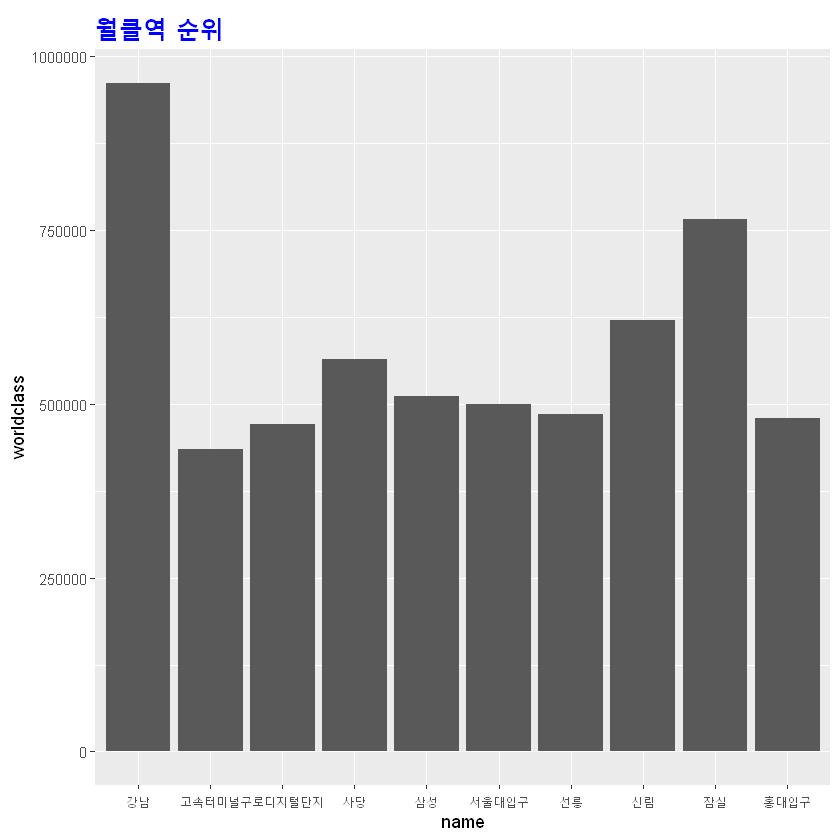

In [143]:
ggplot(data = head(subwayfinal,10), aes(x=name, y=worldclass))+ geom_bar(stat = "identity")+
  labs(title = '월클역 순위')+
  theme(plot.title=element_text(size=20, color="blue", face = "bold"))

***
**중심성 비교
**연구에 사용된 다양한 중심성 개념이 어떠한 양상을 띄는지 비교해보았습니다

-	고유벡터 중심성 순위와 매개 중심성 순위를 비교하기 위하여 고유벡터 중심성을 기준으로 역을 내림차순으로 배열하여 두 순위의 추세를 비교해보았습니다. 앞서 언급한 대로 고유벡터 중심성의 경우 1, 2위의 값이 두드러지게 높으나, 매개 중심성의 경우 값의 차이가 상대적으로 적은 편에 해당합니다. 또한 매개 중심성과 고유벡터 중심성은 비례하는 관계를 보이지 않아 서로 특성이 다르다는 것을 알 수 있었습니다.

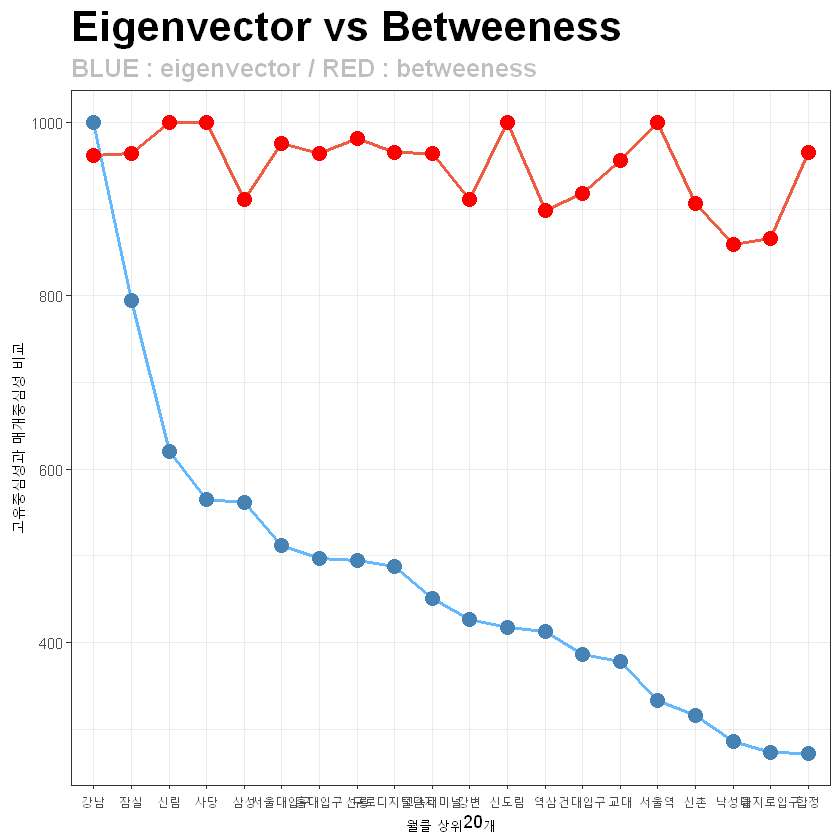

In [144]:
# 고유중심성 vs 매개 중심성
ggplot(head(subwayfinal,20), aes(x= reorder(name, -eigenvector), y= eigenvector, group=1)) +
  geom_line(colour= "steelblue1", size=1) +
  geom_point(colour= "steelblue", size =4) +
  geom_line(aes(y= betweeness), colour ="tomato2", size = 1) +
  geom_point(aes(y =betweeness), colour ="red", size =4) +
  theme_bw() +
  theme(plot.title=element_text(size=25, color="black", face = "bold"),
        plot.subtitle = element_text(size=15, color = "grey", face = "bold")) + 
  labs(title = 'Eigenvector vs Betweeness',
       subtitle = 'BLUE : eigenvector / RED : betweeness ')+
  ylab("고유중심성과 매개중심성 비교")+
  xlab("월클 상위20개")

-	앞선 분석에서 페이지랭크의 경향성이 고유벡터 중심성의 것과 유사한 것으로 추정되어, 둘도 같이 시각화 해서 나타내 보았습니다. 값에는 다소 차이가 있고 일부 예외적인 역이 몇몇 보이긴 하나, 전반적인 흐름을 보았을 때 둘의 값은 유사하다고 볼 수 있었습니다. 이는 페이지랭크 역시 결국 “다른 중요한 역과 얼마나 잘 연결되어 있는지”에 대해 말해주는 개념이기 때문입니다. 따라서 저희는, 고유벡터 중심성만을 활용하여 “중심성 순위”를 구하기로 결정하였습니다. 유사한 두 변수가 모두 반영된다면, 해당 특성이 과장되게 반영될 수 있고 그것은 결과의 왜곡으로 이어질 수 있기 때문에, 그러한 것을 방지하기 위하여 고유벡터 중심성만을 변수로 채택한 것입니다. 

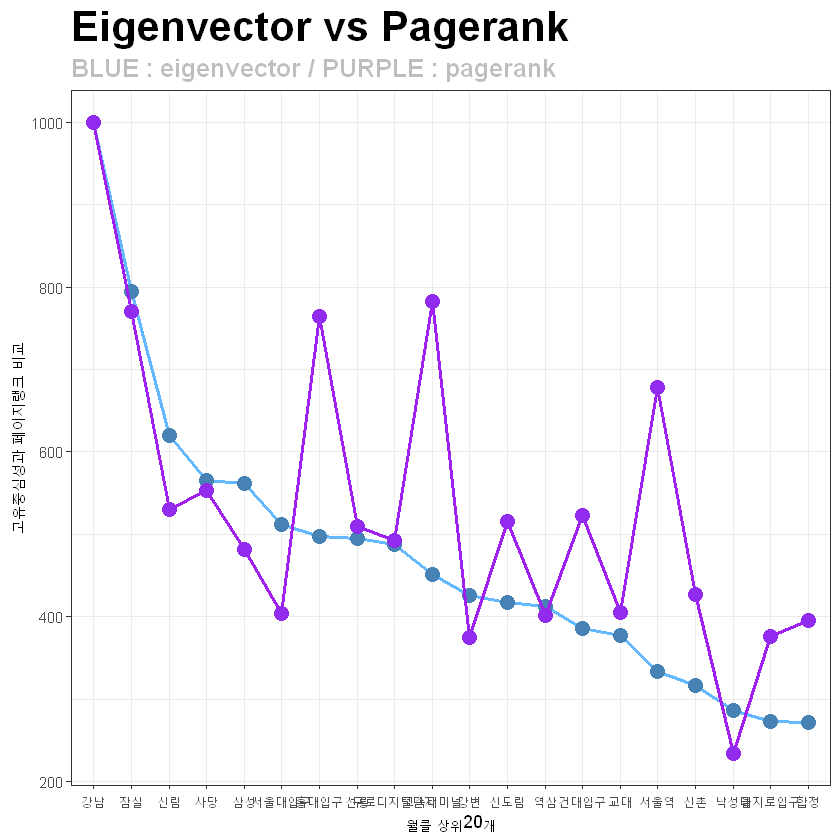

In [145]:
# 고유중심성 vs 페이지랭크
ggplot(head(subwayfinal,20), aes(x= reorder(name, - eigenvector), y= eigenvector, group=1)) +
  geom_line(colour= "steelblue1", size=1) +
  geom_point(colour= "steelblue", size =4) +
  geom_line(aes(y= pagerank), colour ="purple", size = 1) +
  geom_point(aes(y = pagerank), colour ="purple2", size =4) +
  theme_bw() +
  theme(plot.title=element_text(size=25, color="black", face = "bold"),
        plot.subtitle = element_text(size=15, color = "grey", face = "bold")) + 
  labs(title = 'Eigenvector vs Pagerank',
       subtitle = 'BLUE : eigenvector / PURPLE : pagerank')+
  ylab("고유중심성과 페이지랭크 비교")+
  xlab("월클 상위20개")

-   마지막으로 매개 중심성을 기준으로 페이지랭크도 살펴보았습니다. 매개 중심성과 페이지랭크 역시 아무런 관계가 없다는 것을 알 수 있었습니다. 이는 고유벡터 중심성이 매개 중심성과 연관이 없었던 것과 유사한 결과입니다. 

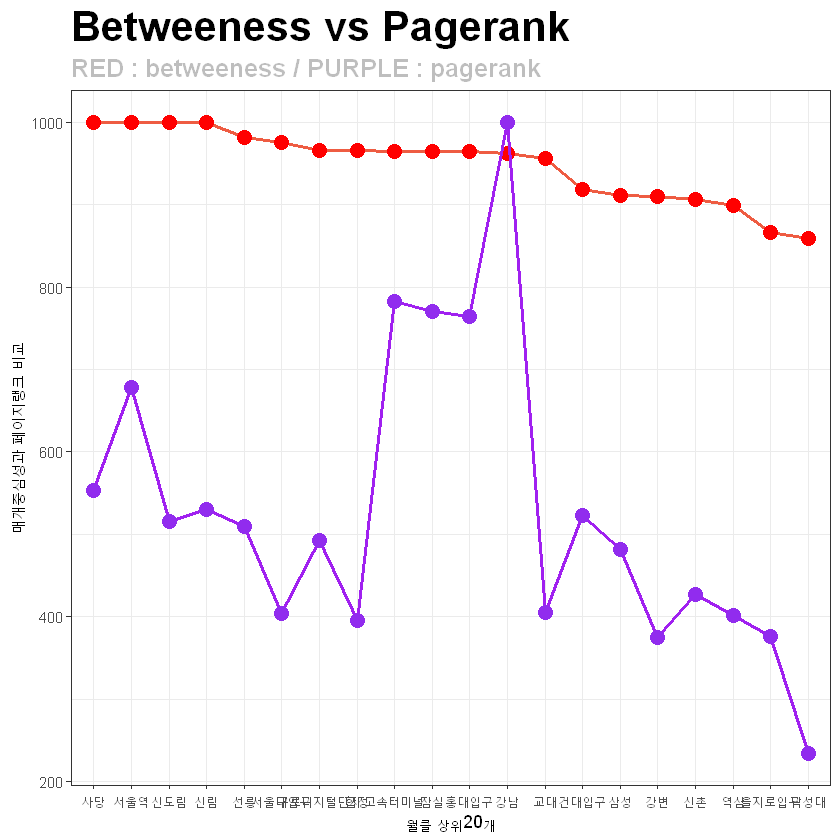

In [146]:
# 매개중심성 vs 페이지랭크
ggplot(head(subwayfinal,20), aes(x=reorder(name, -betweeness), y= betweeness, group=1)) +
  geom_line(colour= "tomato2", size=1) +
  geom_point(colour= "red", size =4) +
  geom_line(aes(y= pagerank), colour ="purple", size = 1) +
  geom_point(aes(y = pagerank), colour ="purple2", size =4) +
  theme_bw() +
  theme(plot.title=element_text(size=25, color="black", face = "bold"),
        plot.subtitle = element_text(size=15, color = "grey", face = "bold")) + 
  labs(title = 'Betweeness vs Pagerank',
       subtitle = 'RED : betweeness / PURPLE : pagerank')+
  ylab("매개중심성과 페이지랭크 비교")+
  xlab("월클 상위20개")

***


-	<span style="color:GREEN"> **저희는 앞서 보았던 승하차 인원수와 중심성 수치를 각각 지도에 나타냈습니다. 각 지하철역들의 좌표 정보를 활용해 태블로에서 중심성 값을 지도에 나타내보았습니다.. 연결 중심성에 해당하는 승객의 수는 비교적 값이 균일하게 분포되어 있으나, 중심성 수치는 서울, 그 중에서도 강남역 근처의 지역에 있는 역들의 값이 두드러지게 큰 것을 확인할 수 있었습니다.**

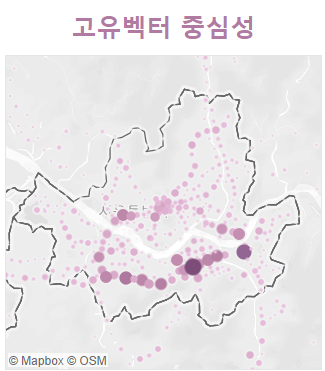

[1] 371 325   4

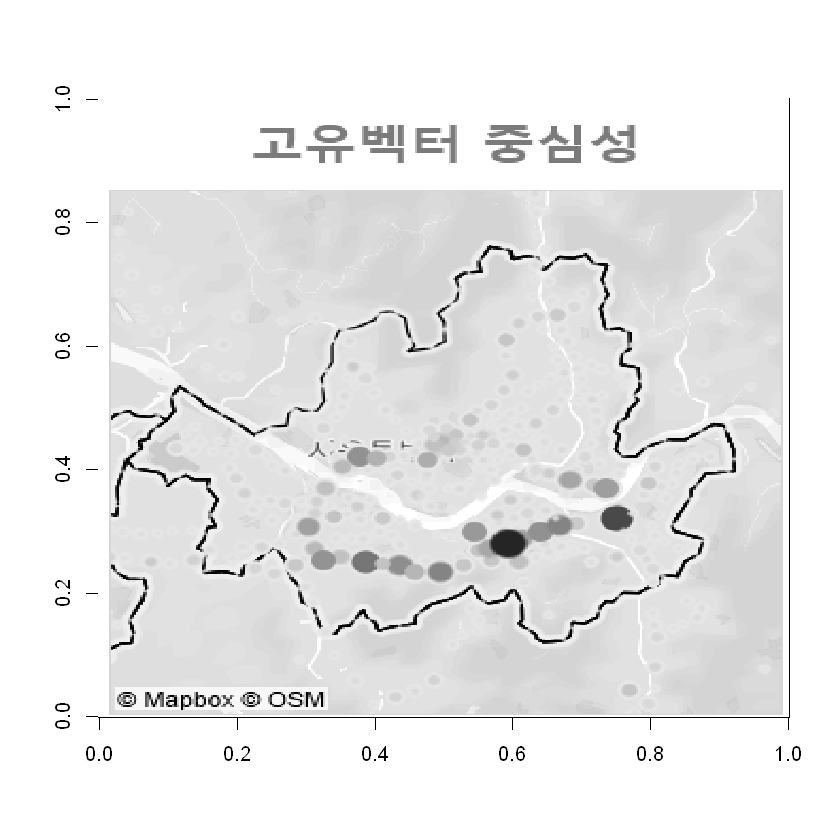

In [15]:
pic_1 <- readPNG('고유벡터 지도.png')
dim(pic_1)
pic_2 <- pic_1[,,1]
image(t(pic_2)[,nrow(pic_2):1], col=grey(seq(0,1,length.out=600)))

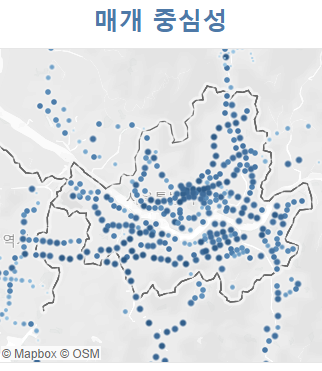

[1] 371 322   4

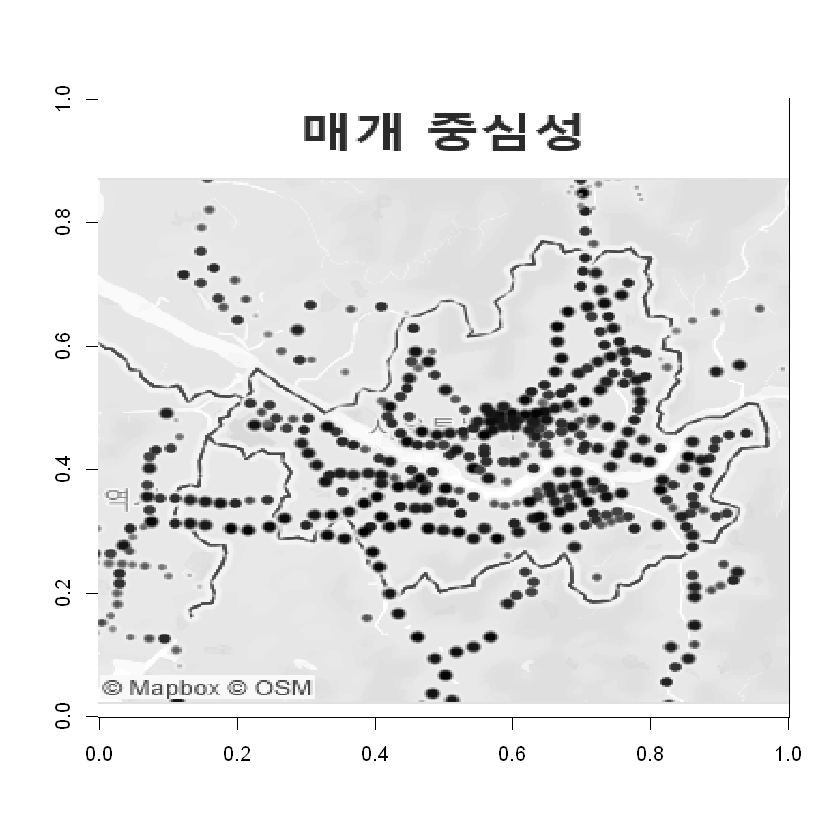

In [16]:
pic_1 <- readPNG('매개 지도.png')
dim(pic_1)
pic_2 <- pic_1[,,1]
image(t(pic_2)[,nrow(pic_2):1], col=grey(seq(0,1,length.out=600)))

**월간 승하차 수는 비교적 고른 분포를 보이고 있으며, 
특정 역(서울역, 강남, 고속터미널 등)의 값이 크게 나타났습니다**

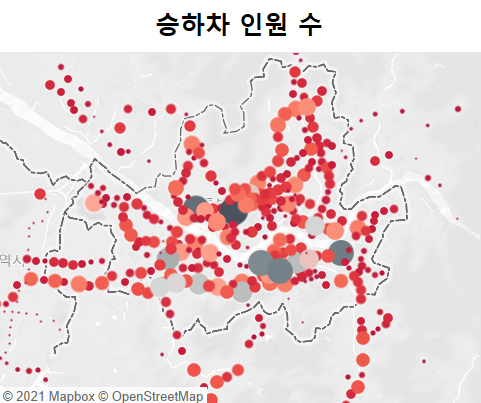

[1] 403 481   4

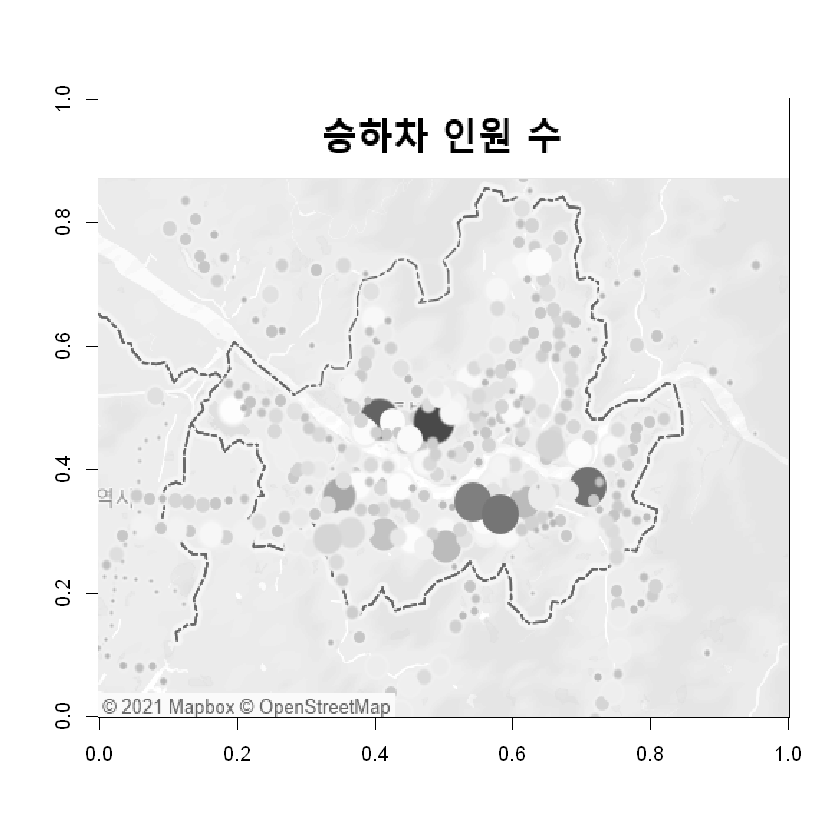

In [18]:
pic_1 <- readPNG('승하차 지도.png')
dim(pic_1)
pic_2 <- pic_1[,,1]
image(t(pic_2)[,nrow(pic_2):1], col=grey(seq(0,1,length.out=600)))

**중심성 수치는 서울에 집중되어 있으며,
특정 지역 (강남역 근처)의 값이 두드러집니다**


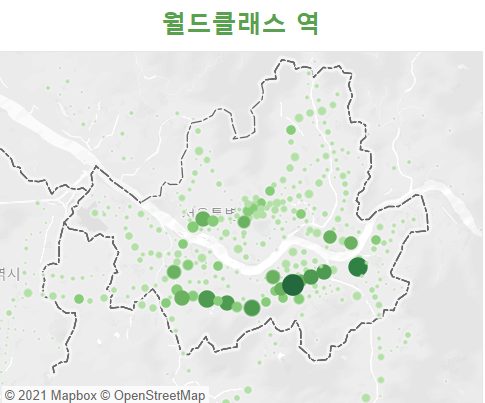

[1] 403 485   4

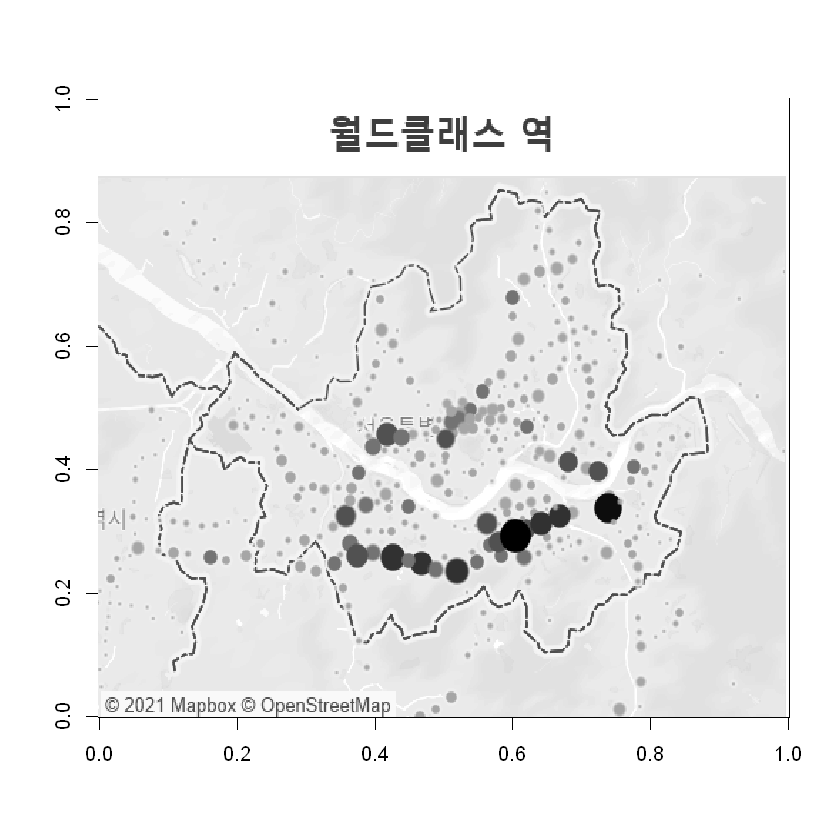

In [19]:
pic_1 <- readPNG('월클 지도.png')
dim(pic_1)
pic_2 <- pic_1[,,1]
image(t(pic_2)[,nrow(pic_2):1], col=grey(seq(0,1,length.out=600)))

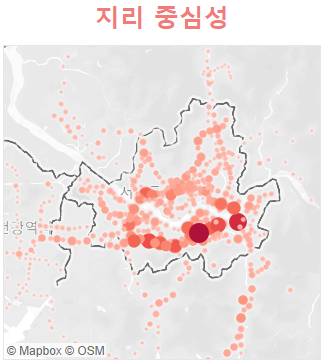

[1] 361 326   4

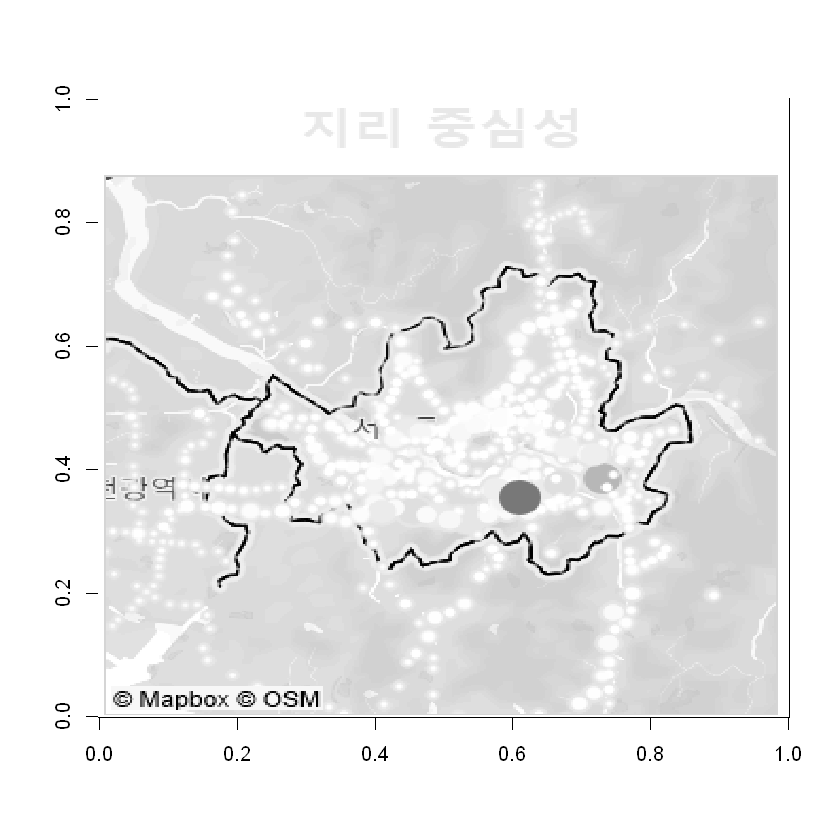

In [20]:
pic_1 <- readPNG('지리 지도.png')
dim(pic_1)
pic_2 <- pic_1[,,1]
image(t(pic_2)[,nrow(pic_2):1], col=grey(seq(0,1,length.out=600)))

***
<span style="color:blue"> *그래프가 아닌, 지도로 나타낸 수치를 통해 인사이트를 도출해보았습니다*

### 수도권 지하철의 중심성은 강남권에 편중되어 있습니다.

-	**,중심성 수치가 높은 상위 20개 역 중 무려 14개의 역들이 한강의 남쪽에 위치하고 있었습니다. 역의 개수나 인구수에서는 강남과 강북 권역의 차이가 크지 않음에도 “월클역”들에서 이러한 차이가 나타났다는 것은 곧 강남과 강북의 교통 격차가 존재한다는 것을 암시하는 것일 수도 있다 생각합니다.**

-	**또한 중심성 수치가 높은 역들을 가상의 선으로 연결해보면 2호선의 노선도와 비슷한 모습을 보이고 있습니다. 이를 통해, 2호선의 역들의 중심성 수치가 비교적 높다는 것을 알 수 있었습니다.**

-	**강남과 강북의 차이와 2호선의 영향력을 잘 보여주는 사례가 바로 홍대입구역과 서울역입니다. 두 역은 승하차 인원수 순위가 상당히 높았음에도, 강북권에 위치하여 상대적으로 중심성 순위는 낮았습니다. 그런데 홍대입구역은 2호선과 연결되어 있어 서울역보다는 높은 중심성 수치를 보였습니다.**

-	**강남과 강북의 차이뿐 아니라, 지역 자체의 차이도 확연하게 드러났습니다. 명동역과 수원역은 승하차 수가 거의 동일하지만, 수원역의 중심성 수치는 명동역의 절반에 해당하였습니다. 이에 저희는 지역적 요인이 중심성 수치에 많은 영향을 주고 있다는 것을 알 수 있었습니다.** 

***


### <span style="color:GREEN"> 지하철 네트워크의 특성 분석 

-	지하철 네트워크의 특성을 바탕으로 정책 제언을 할 것인 만큼, 이러한 특성이 나타나게 된 구체적인 배경과 원인을 추론해보았습니다. 지하철 네트워크에 영향을 줄 수 있을 만한 변수들을 몇 가지 미리 상정한 다음, 실제 결과와 변수의 관련성을 살펴보고자 합니다. 특히 하위 순위로 갈수록 값의 차이가 적어져 유의미한 결과인지 확신할 수 없기 때문에, 상위권 역들, 월클역들을 기준으로 분석을 진행하였습니다.


-	먼저, **자치구별 지하철역의 개수**입니다. 주변에 지하철역이 많다면 그 자치구에서는 전체적으로 지하철 이용자가 많고 지하철 인프라가 잘 구축되어 있다는 것을 의미할 수 있습니다. 혹은 반대로, 주변에 지하철역이 너무 많다면 이용객과 투자가 분산되어 오히려 중심성이 낮게 나올 수도 있다 판단하였습니다. 이에 **자치구를 범위로 잡아 지하철역의 개수를 계산한 후, 지하철역 개수의 경향성과 중심성 수치의 경향성을 비교**하였습니다. 그러나 둘은 <u>긍정적으로도, 부정적으로도 상관 관계가 있지 않아 보였습니다.</u> 관악구의 경우 4개의 역이 모두 상위 20위 안에 들었음에도 역의 개수는 가장 적은 편이었으며, 강서구, 노원구 등은 역의 개수가 상당히 많은 편임에도 상위 20위의 역을 하나도 배출하지 못하였습니다. 이에 자치구별 지하철역의 개수와 중심성 수치는 큰 연관이 없다고 판단되었습니다. **이는 지하철역의 개수만을 늘리는 것이 교통 격차 해소나 인프라 개선에 의외로 큰 효과가 없을 수 있다는 것을 암시하는 결과라 생각합니다.**


![image.png](분석1.png)

[1]  827 1059    4

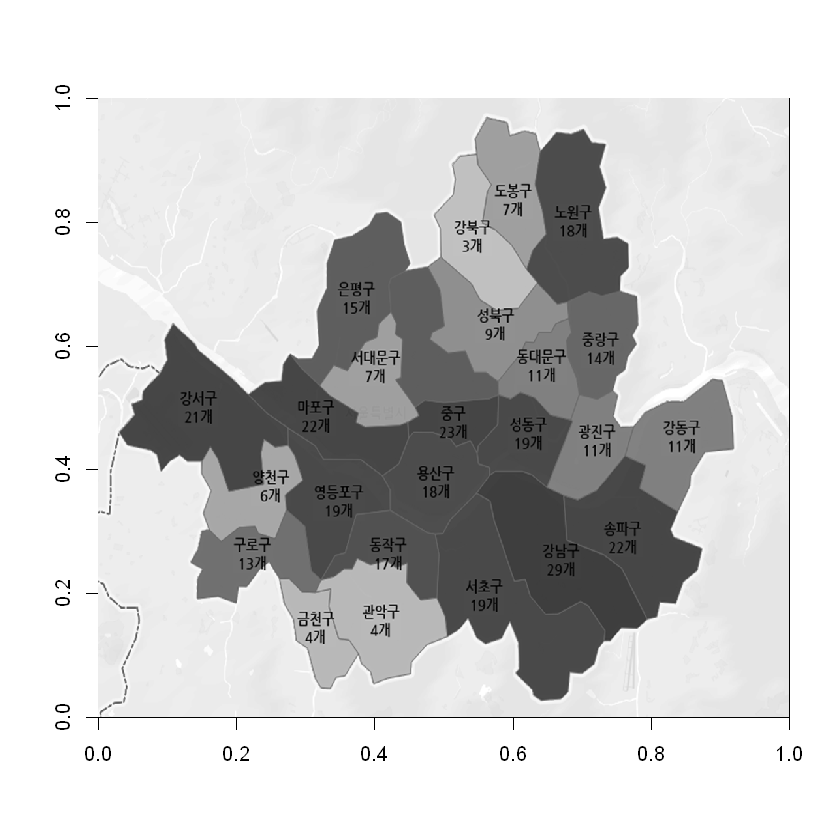

In [25]:
pic_1 <- readPNG('분석1.png')
dim(pic_1)
pic_2 <- pic_1[,,1]
image(t(pic_2)[,nrow(pic_2):1], col=grey(seq(0,1,length.out=600)))

-	두 번째로, **역에 대한 접근성과 중심성 순위의 경향성**을 살펴보았습니다. 역에 대한 접근성이라 함은, **“도보 10분 내에 지하철역에 접근할 수 있는지”** 를 의미합니다. 도보 10분이 넘어가는 순간 쉽게 접근할 수 있다고 볼 수는 없기 때문입니다. 아울러 분석의 대상이 되는 행정구역의 기준은 “동”으로 하였는데, 이는 실질적으로 지하철역에 접근하는 것을 파악하기 위해서는 시나 구 단위보다는 같은 동을 기준으로 하는 것이 적합하다 판단하였기 때문입니다. 이 결과를 분석한 그래프는 위와 같은데, 이 결과를 볼 때 **어느 정도 접근성이 중심성과 상당한 관련이 있다** 고 사료되었습니다. 서울시의 424개의 동 중 지하철역이 3개 이상인 동은 103개인데, 그 중 35개가 강남3구에 속하였습니다(2019년 기준). 관악구의 경우 예외적으로 산이 많기 때문에 중심성 수치가 높은 역들이 많음에도 접근성이 낮다는 결과가 나온 것으로 판단되며, 그 외의 경우 전반적으로 중심성 수치가 높은 역들이 많이 속해 있는 구에서는 시민들의 지하철역의 접근성이 높은 반면, 중심성 수치가 높은 역들이 적은 구에서는 접근성이 낮게 나왔습니다. 이는 **일부 지역에서는 시민들의 역에 대한 접근성을 개선하는 방식으로 접근할 필요가 있음을 시사하는 결과라고 볼 수 있습니다.**

![image.png](분석2.png)

[1]  745 1552    4

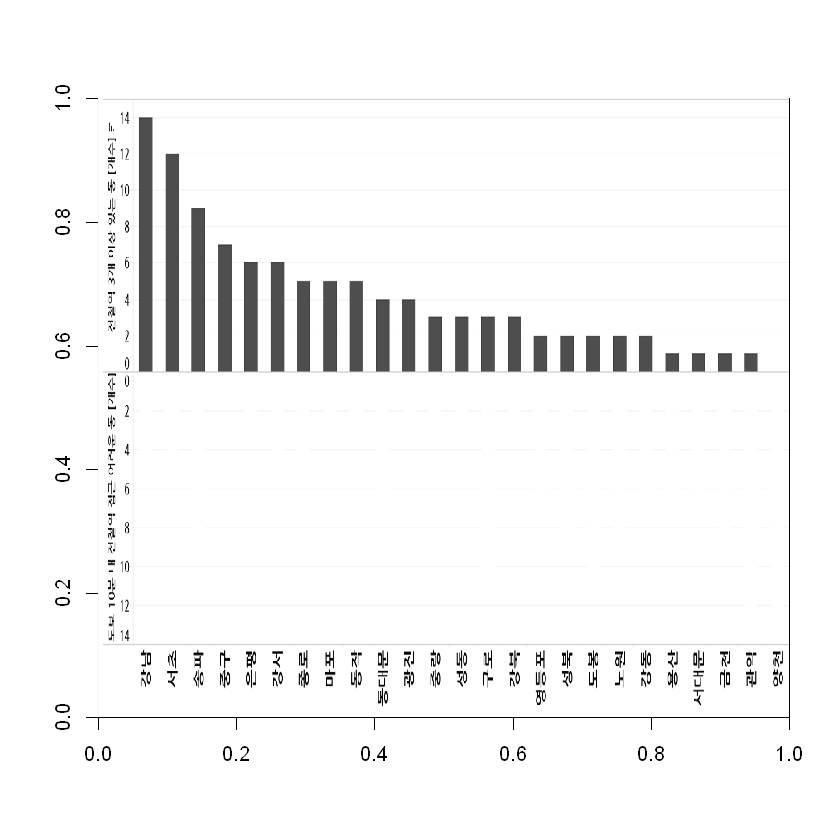

In [39]:
pic_1 <- readPNG('분석2.png')
dim(pic_1)
pic_2 <- pic_1[,,1]
image(t(pic_2)[,nrow(pic_2):1], col=grey(seq(0,1,length.out=600)))

-	세 번째로, **지하철을 이용할 수 있는 잠재적 인원의 수가 중심성과 어떤 관련이 있는지** 살펴보았습니다. 어떠한 지하철역을 이용하는 승객을, **“역 근처에 거주하기 때문에 해당 역을 이용하는 사람”** 과, **“직장에 출근하기 위해 해당 역을 이용하는 사람”** 크게 두 가지로 나누었습니다. 이에 중심성 수치가 높은 역들이 속한 동의 주민 수와 직장인 수를 모두 고려하였습니다. 결과는 위의 그래프와 같으며, 결론적으로 거주민의 수는 크게 연관성이 떨어지며 직장인의 수가 중심성 값에 많은 영향을 끼친다는 것을 알 수 있었습니다. 중심성 수치가 높은 역들이 속한 동의 주민수 순위의 평균은 113.5위인 반면, 직장인 수 순위의 평균은 45.4위였습니다. 특히 몇몇 동은 직장인 수 순위가 한 자릿수에 해당할 만큼 높은 수준이었습니다. 이는 **교통 격차를 해소하기 위해선 거주자가 많은 지역에 지하철 접근성을 높일 필요가 있다는 것을 시사하는 결과**라 볼 수 있습니다. 

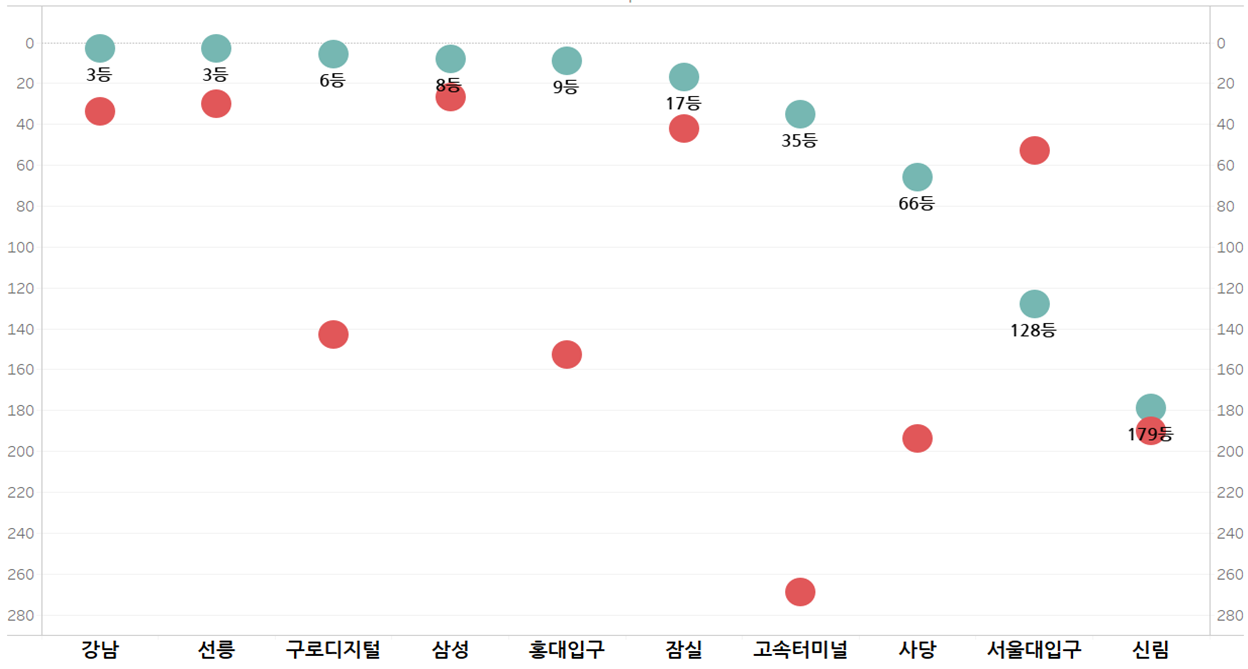

[1]  669 1248    4

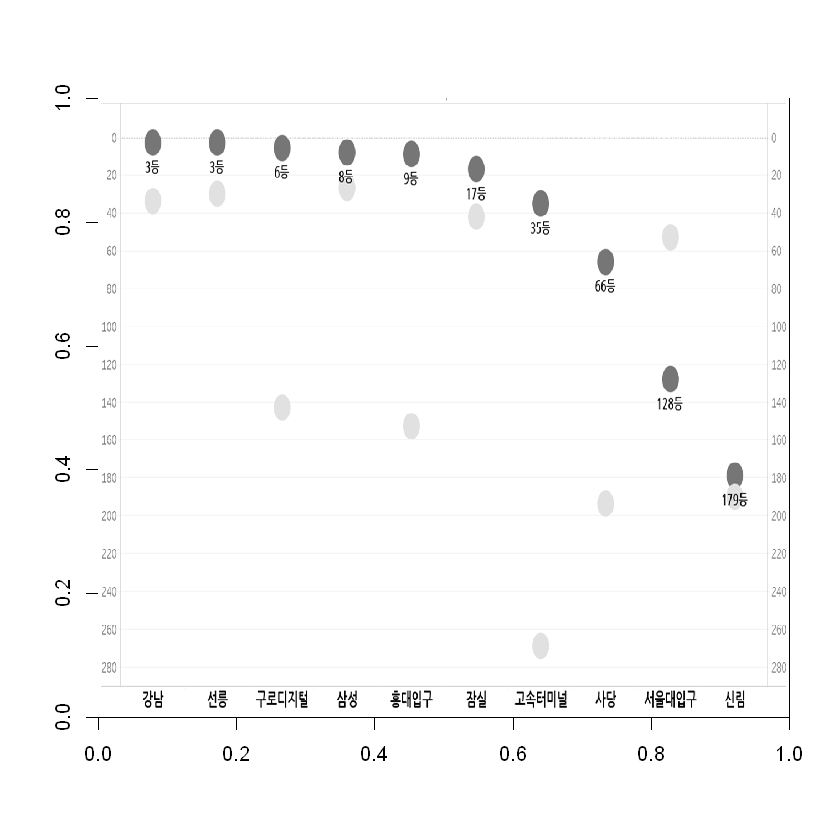

In [27]:
pic_1 <- readPNG('분석3.png')
dim(pic_1)
pic_2 <- pic_1[,,1]
image(t(pic_2)[,nrow(pic_2):1], col=grey(seq(0,1,length.out=600)))

### <span style="color:GREEN"> 연구 활용 방안 제언
    
    
-	중심성이 높은 역들을 기준으로 **시설 개선, 인프라 확장** 등이 이루어진다면 큰 효과를 볼 수 있을 것이라 판단합니다. 물론 모든 역을 동시에 완벽하게 관리할 수 있다면 가장 좋을 것이지만, 현실적으로는 인력, 비용, 시간 등의 제약으로 인하여 그렇게 하는 것이 불가능할 것입니다. 또한 중심성이 높은 역들이 모여 있는 노선은 네트워크에서 중요한 역할을 담당하고 있다는 것을 의미하기 때문에 사고가 발생할 가능성도 높습니다. 실제로 철도안전정보종합관리시스템에 따르면, 2015년부터 2019년까지 서울 도시철도 2호선에서 철도 사고는 11건이 발생하였는데, 수도권 도시철도 1~9호선 중에서는 가장 많은 수치에 해당합니다. 따라서 **중심성이 높은 역과 노선부터 인프라를 개선하고 사고 대비를 진행하여, 효율적인 관리가 가능하게 해야 합니다.** 중심성이 높은 월클역들을 위주로 노후화된 시설을 개선하거나, 대피 선로를 추가로 건설하여 원활한 소통이 가능하게 하는 등의 방법을 생각해볼 수 있습니다. 중심성이 높은 역들이 견고하게 제 역할을 다하고 있다면, 전체 지하철 네트워크에서 발생하는 문제를 최소화할 수 있을 것입니다.
(출처: https://www.railsafety.or.kr/content/StatsLine_ContentView.do)


-	중심성 개념을 **장애인 이동권** 문제와도 연결 지어 볼 수 있습니다. 실제로 장애인차별철폐연대 등 장애인 단체는 2001년 오이도역에서 휠체어 리프트를 이용한 장애인 부부가 추락사한 이후 현재까지 지속적으로 “이동권 보장 시위”를 이어가고 있습니다. 이 분들의 시위는 휠체어가 역마다 승하차를 반복하는 형태로 진행되는데, 이로 인한 시민들의 불편은 큰 상황입니다. 그러나 시민들의 불편을 이유로 그들의 시위를 막고 목소리를 묵살할 것이 아니라, 모든 시민들의 이동권 보장에 집중해야 할 것입니다. 이때, 중심성이 높은 역을 대상으로 이동권 보장을 위한 작업을 시작할 수 있을 것이라 생각합니다. 아직까지 휠체어리프트만 설치된 역이 남아 있고(남영역 등), 여전히 장애인의 이동권이 보장되지 않고 있는 만큼 중심성이 높은 역부터 이동권 개선을 더욱 효과적으로 진행할 수 있을 것입니다.



-	특히 장애인 이동권과 관련하여, 저희는 **“화재 등 유사시 휠체어 이용자의 대피 경로 및 소요 시간”** 에 대해 살펴보기도 하였습니다. **최단 경로 탐색을 가능하게 해주는 파이썬의 다익스트라 알고리즘**을 사용하여 최단경로를 계산한 다음, 해당 최단경로를 실제 휠체어로 이동해보는 방식으로 시험을 해봤습니다. 사람이 직접 이동하여야 하기 때문에 모든 역을 조사할 수는 없었으나, 중심성 순위가 높은 편에 해당하면서도 4개의 호선이 교차하여 상당히 복잡하다고 볼 수 있는 홍대입구역을 대표적으로 조사해보았습니다. 


### 파이썬으로 분석한 것이므로, R 환경에서 불러들일 수 없는 이슈가 발생했습니다.
### 이에 해당하는 파이썬 코드는, 주석처리 해놓았습니다!

***


### <span style="color:GREEN"> **휠체어 이용자 대피를 위한 지하철역 화재대피용 엘리베이터 설치 전략**


-	**1. 연구 대상 - 홍대입구역** 
    
    
    
-	    1.1 개요 : 비상시 지하철역내 휠체어 이용자의 대피 경로 확보를 위한 '화재대피용 엘리베이터' 설치 전략 제시.
    
    

-	    1.2 홍대입구 역 선정 이유 : *2호선, 경의중앙선, 공항철도 등 3개 노선 교차*. 3개 노선이 교차하는 환승역이며 중심성이 높은 지하철역임을 고려할 때 시설연결망의 복잡도가 높을 것으로 예상. 특정 사례에 대한 분석을 바탕으로 보다 많은 지하철역에 적용가능한 전략 제시를 하고자 하므로 홍대입구역을 선정.
    ***

[홍대 입구역 시설 연결망]

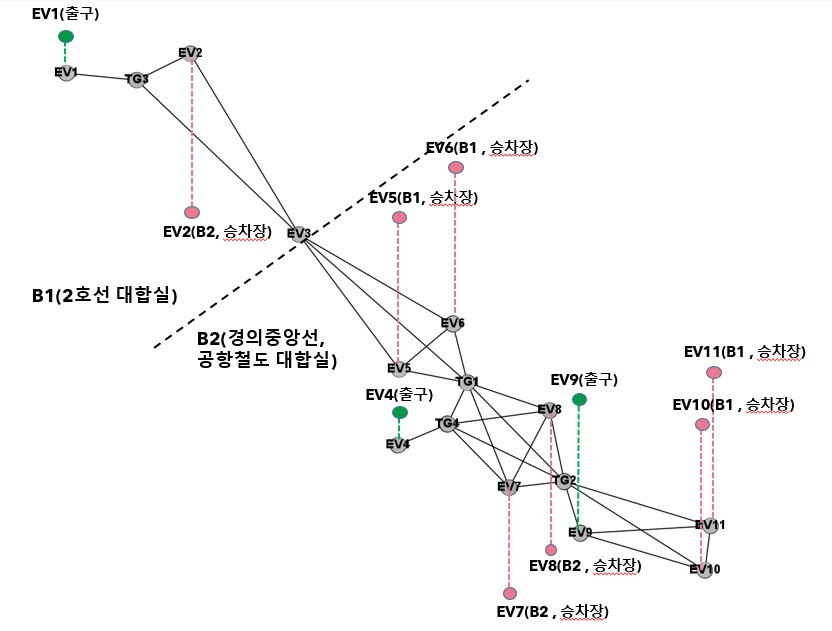

[1] 631 832   4

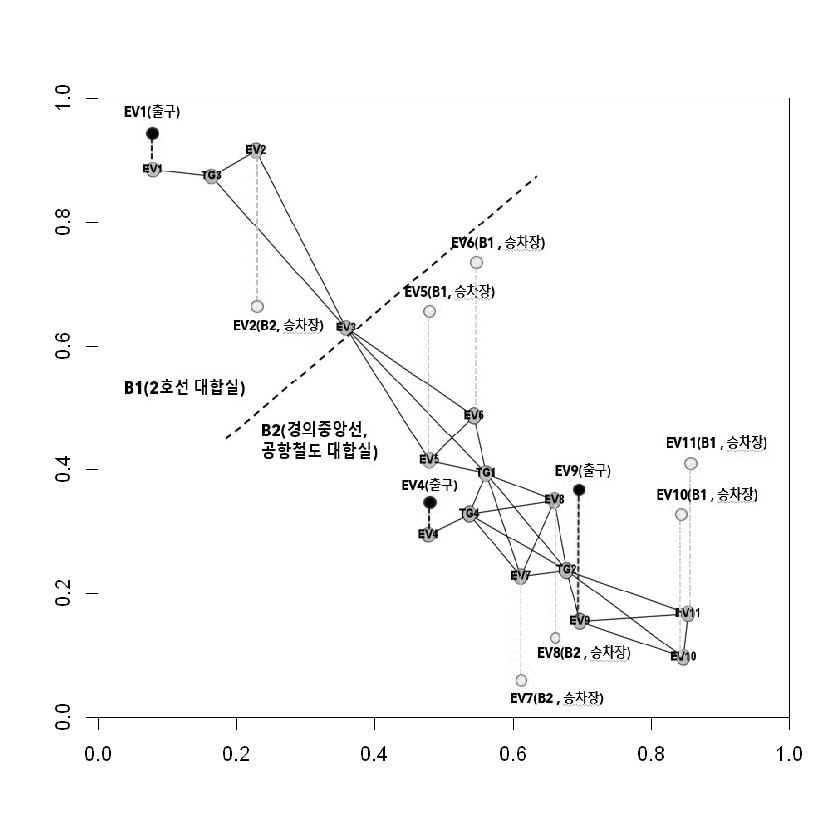

In [28]:
pic_1 <- readPNG('홍입 지도.png')
dim(pic_1)
pic_2 <- pic_1[,,1]
image(t(pic_2)[,nrow(pic_2):1], col=grey(seq(0,1,length.out=600)))

* 전략 설정 시나리오:지하철 열차 내에 화재가 발생하여 홍대입구역에 정차하였다. 휠체어 이용자는 화재대피용 엘리베이터를 이용해 자력으로 승차장에서 지상으로 대피를 시도한다. 

**이 대피경로를 최적화할 수 있도록 홍대입구역 내 11개 엘리베이터 중 일부를 화재대피용 엘리베이터로 교체한다.**

***

### <span style="color:BLUE"> 최적화 전략 탐색을 위한 추가 조건:
-	    (1) 휠체어 이용자가 대피를 시도하는 승차장의 위치와 관계없이 최소한 2개의 대피 경로가 제공되어야 한다. 
         2개의 대피 경로를 확보하기 위해서는 대합실과 지상 출구를 연결하는 세 엘리베이터 EV1, EV4, EV9 중 최소한 두 엘리베이터는 화재대피용 엘리베이터로 교체되어야 한다. 


####   <span style="color:RED"> 또한 2호선 열차 이용객의 탈출 경로 확보를 위해 반드시 EV3가 화재대피용 엘리베이터로 교체되어야 한다.


-	    (2) 화재대피용 엘리베이터의 설치 대수는 최소한으로 제한한다. 이는 위 (1)에 따라 8대이다.
-	    (3) EV2, EV7, EV8은 각 승차장의 유일한 엘리베이터이므로 반드시 화재대피용 엘리베이터로 교체되어야 한다. 



####    <span style="color:RED"> 이외 승차장에 설치된 EV5, EV6, EV10, EV11의 경우 탈출경로 시작점 후보지로 간주될 수 있다.

***

#### 휠체어 이용자의 홍대입구역 탈출경로에서 주요한 시설들(엘리베이터, 개찰구 등/ graph의 node)로 이루어진 시설연결망을 그래프로 정의한다. 


**edge에 부여된 가중치는 휠체어로 한 node에서 다른 node로 이동하는 데에 소요되는 시간이다.(단위:초)** 



In [147]:
# HongikStation = {
#     'EV1': {'TG3': 32 },
#     'EV2': {'EV3': 173, 'TG3':31},
#     'EV3': {'EV2': 173, 'EV5': 106 , 'EV6': 106, 'TG1': 104, 'TG3': 181},
#     'EV4': {'TG4':13},
#     'EV5': {'EV3': 106, 'EV6': 15,'TG1': 17},
#     'EV6': {'EV3': 106, 'EV5': 15, 'TG1':16},
#     'EV7': {'EV8': 23,'TG1': 48 , 'TG2': 35, 'TG4': 46},
#     'EV8': {'EV7': 23, 'TG1': 46, 'TG2': 35, 'TG4': 49},
#     'EV9': {'EV10': 84, 'EV11': 86,'TG2': 21},
#     'EV10': {'EV9': 84,'EV11': 32,'TG2': 77},
#     'EV11': {'EV9': 86,'EV10': 32,'TG2': 79},
#     'TG1': {'EV3': 104, 'EV5': 17, 'EV6': 16, 'EV7': 48, 'EV8': 46,'TG2': 73, 'TG4': 12},
#     'TG2': {'EV7': 35, 'EV8': 35,'EV9':21 ,'EV10': 77, 'EV11': 79,'TG1': 73, 'TG4': 60},
#     'TG3': {'EV1': 32, 'EV2': 31, 'EV3': 181},
#     'TG4': {'EV4': 13, 'EV7': 46, 'EV8': 49, 'TG1': 12 , 'TG2': 60}
# }

In [148]:
##### 탈출경로의 출발지가 될 수 있는 것은 각 호선 플랫폼에 위치한 EV2, EV5, EV6, EV7, EV8, EV10, EV11 이다.
#### 각 출발지로부터 각각의 역 출입구, 즉 EV1, EV4, EV9에 이르는 데에 소요되는 최소 시간을 다익스트라 알고리즘으로 산출한다.

# import heapq  

# def dijkstra(HongikStation, platformEV):  # plaformEV는 곧 탈출경로 시작점
#   time = {node: float('inf') for 'EV1','EV4','EV9' in HongikStation}  # 한 node에서 다른 node로 이동하는 데에 소요되는 시간. 최단시간으로 갱신하기 위해 처음에는 float('inf') 설정.
#   time = {node: float('inf') for node in HongikStation}  # 한 node에서 다른 node로 이동하는 데에 소요되는 시간. 최단시간으로 갱신하기 위해 처음에는 float('inf') 설정.
#   time[platformEV] = 0  # 시작값 초기화
#   queue = []
#   heapq.heappush(queue, [time[platformEV], platformEV])  # 탈출경로 시작점부터 queue에 등록

#   while queue:  
#     current_time, current_destination = heapq.heappop(queue)  # queue에서 최단 시간이 할당된 (시간, 노드)을 꺼내옴

#     for new_destination, new_time in HongikStation[current_destination].items():
#       timespent = current_time + new_time  # 해당 노드를 거쳐 이동할 때 소요되는 시간 
#       if timespent < time[new_destination]:  
#         time[new_destination] = timespent  # timespent가 더 작다면 최단시간 갱신
#         heapq.heappush(queue, [timespent, new_destination])  # queue에 갱신된 최단시간을 반영
    
#   return time

In [149]:
#각 탈출경로 출발지로부터 다른 node에 이르는 데에 걸리는 최단시간 산출
# print(dijkstra(HongikStation, 'EV2'))
# print(dijkstra(HongikStation, 'EV5'))
# print(dijkstra(HongikStation, 'EV6'))
# print(dijkstra(HongikStation, 'EV7'))
# print(dijkstra(HongikStation, 'EV8'))
# print(dijkstra(HongikStation, 'EV10'))
# print(dijkstra(HongikStation, 'EV11'))

In [150]:
#위 코드를 실행한 결과!
# {'EV1': 63, 'EV2': 0, 'EV3': 173, 'EV4': 302, 'EV5': 279, 'EV6': 279, 'EV7': 325, 'EV8': 323, 'EV9': 370, 'EV10': 426, 'EV11': 428, 'TG1': 277, 'TG2': 349, 'TG3': 31, 'TG4': 289}
# {'EV1': 319, 'EV2': 279, 'EV3': 106, 'EV4': 42, 'EV5': 0, 'EV6': 15, 'EV7': 65, 'EV8': 63, 'EV9': 110, 'EV10': 166, 'EV11': 168, 'TG1': 17, 'TG2': 89, 'TG3': 287, 'TG4': 29}
# {'EV1': 319, 'EV2': 279, 'EV3': 106, 'EV4': 41, 'EV5': 15, 'EV6': 0, 'EV7': 64, 'EV8': 62, 'EV9': 109, 'EV10': 165, 'EV11': 167, 'TG1': 16, 'TG2': 88, 'TG3': 287, 'TG4': 28}
# {'EV1': 365, 'EV2': 325, 'EV3': 152, 'EV4': 59, 'EV5': 65, 'EV6': 64, 'EV7': 0, 'EV8': 23, 'EV9': 56, 'EV10': 112, 'EV11': 114, 'TG1': 48, 'TG2': 35, 'TG3': 333, 'TG4': 46}
# {'EV1': 363, 'EV2': 323, 'EV3': 150, 'EV4': 62, 'EV5': 63, 'EV6': 62, 'EV7': 23, 'EV8': 0, 'EV9': 56, 'EV10': 112, 'EV11': 114, 'TG1': 46, 'TG2': 35, 'TG3': 331, 'TG4': 49}
# {'EV1': 466, 'EV2': 426, 'EV3': 253, 'EV4': 150, 'EV5': 166, 'EV6': 165, 'EV7': 112, 'EV8': 112, 'EV9': 84, 'EV10': 0, 'EV11': 32, 'TG1': 149, 'TG2': 77, 'TG3': 434, 'TG4': 137}
# {'EV1': 468, 'EV2': 428, 'EV3': 255, 'EV4': 152, 'EV5': 168, 'EV6': 167, 'EV7': 114, 'EV8': 114, 'EV9': 86, 'EV10': 32, 'EV11': 0, 'TG1': 151, 'TG2': 79, 'TG3': 436, 'TG4': 139}

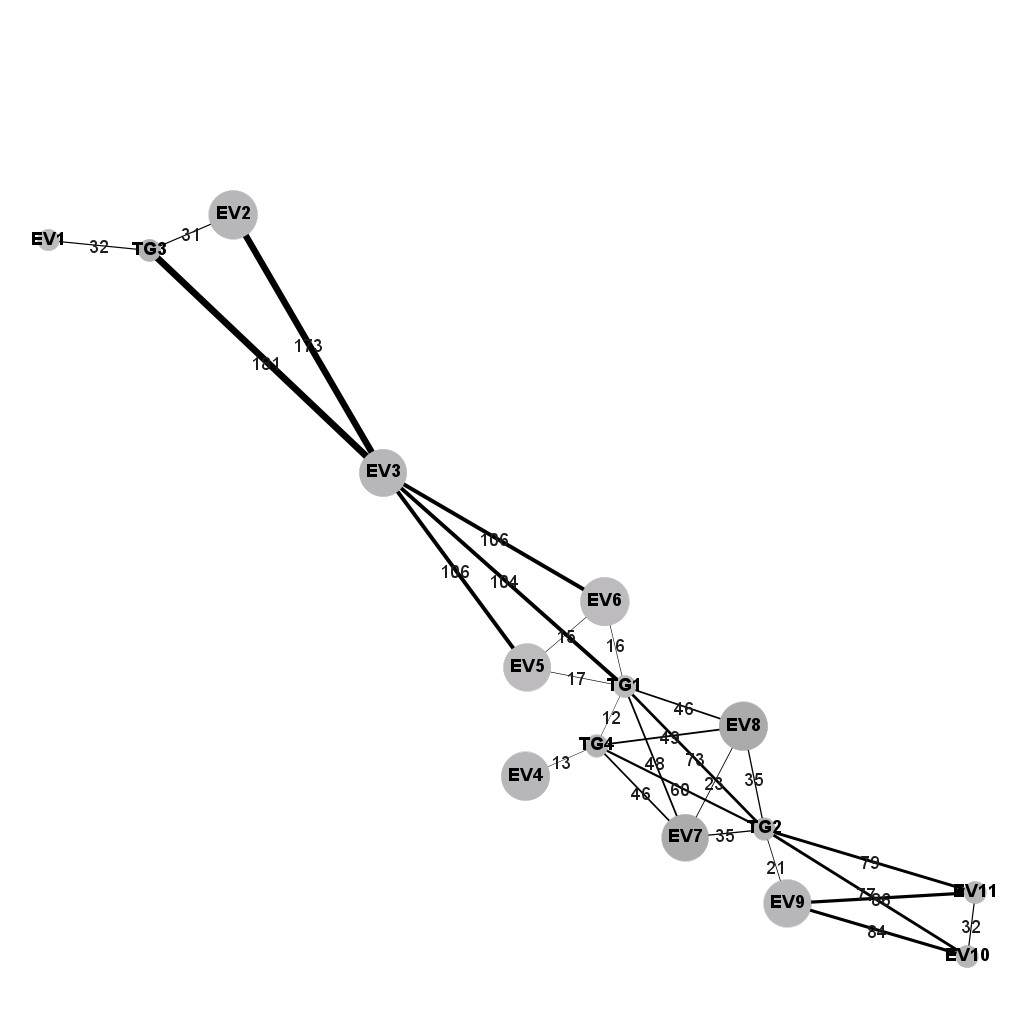

[1] 1024 1024    4

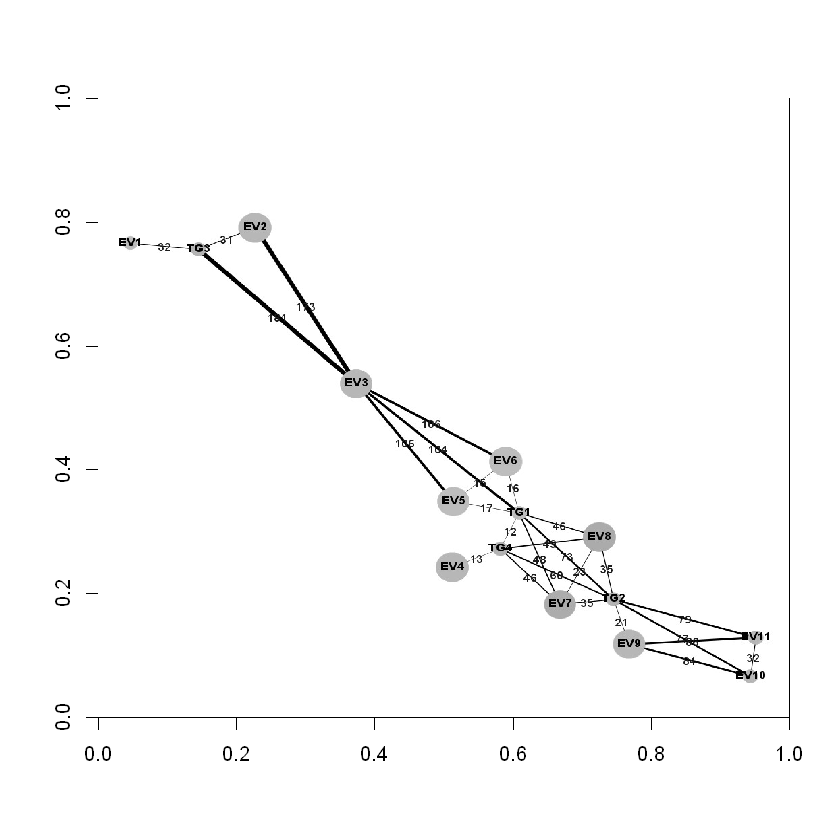

In [29]:
pic_1 <- readPNG('홍입 게피.png')
dim(pic_1)
pic_2 <- pic_1[,,1]
image(t(pic_2)[,nrow(pic_2):1], col=grey(seq(0,1,length.out=600)))

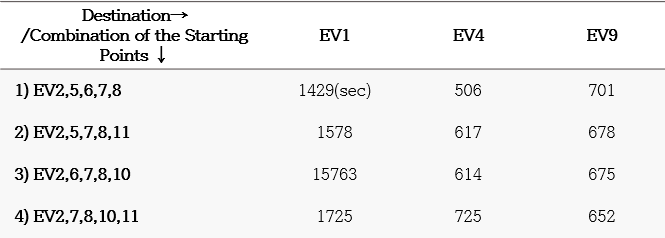

[1] 238 665   4

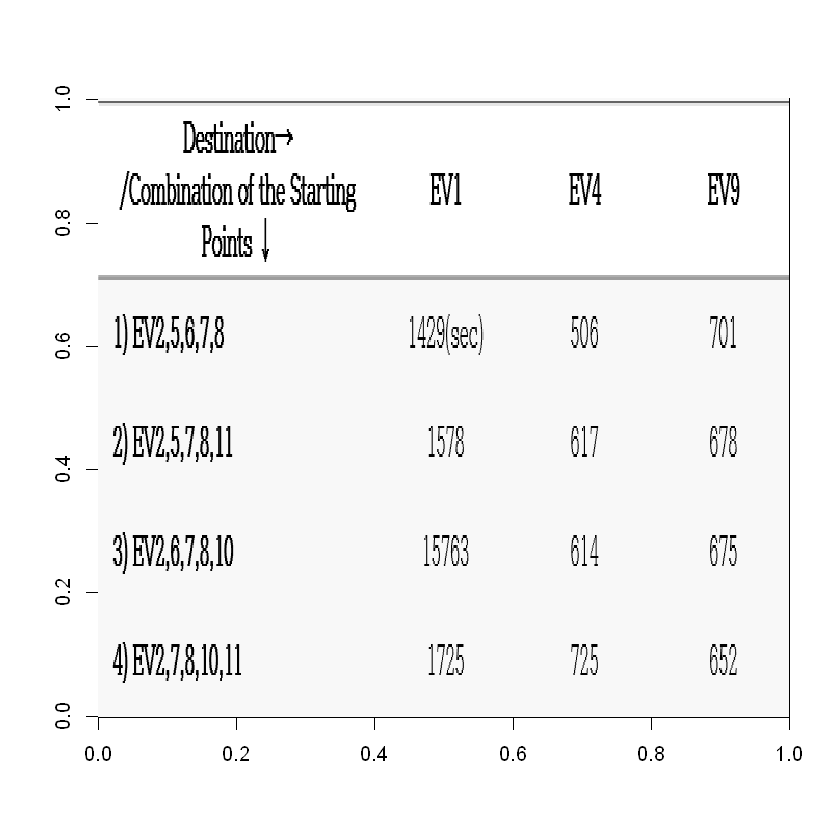

In [31]:
pic_1 <- readPNG('홍입 표.png')
dim(pic_1)
pic_2 <- pic_1[,,1]
image(t(pic_2)[,nrow(pic_2):1], col=grey(seq(0,1,length.out=600)))

**EV2, EV5, EV6, EV7, EV8이 대피 경로 시작 지점이고 EV4가 대피 경로 도착 지점일 때에 가장 낮은 최소경로비용이 요구되는 것으로 나타남. EV3까지 7개 엘리베이터 화재대피용 설치 지점 확정**

**EV2, EV5, EV6, EV7, EV8가 시작 지점으로 설정된 상황에서 도착 지점이 EV9일 때 EV1이 도착 지점일 때보다 최소경로비용의 합이 더 낮으므로 EV9 최종 설치 지점 확정.**

***
**이와 같은 방식을 이용하여 중심성이 높은 다른 역들의 장애인 이동권을 위한 전략을 제언할 수 있습니다. 모든 역들이 barrier-free한 것이 best지만, 한정된 리소스로 최대한 많은 사람들의 편의를 유도할 수 있습니다.**

-	**편의시설, 문화시설** 과 관련해서도 중심성 개념이 활용될 수 있습니다. 실제로 최근 서울시교육청은 스마트도서관 10개 관을 지하철 역사 내부에 설치한다고 하였습니다. 또한 서울교통공사의 사이버스테이션 정보에 따르면, 일부 역에는 무인민원발급기, 자전거보관소, 환전키오스크 등이 설치되어 있습니다. 모든 지하철역에 편의시설, 문화시설을 전부 마련한다면 가장 좋을 것이지만, 그것은 현실적으로 불가능할 것입니다. 따라서 이러한 편의시설을 추가로 설치할 때 중심성을 고려한다면 한정된 예산으로도 시민들의 편리함을 극대화하고 최대한 많은 시민들이 그 이익을 누릴 수 있게 될 것입니다. 


(출처: http://www.nbnnews.co.kr/news/articleView.html?idxno=516377)




-	**신노선의 개통** 을 위해서도 중심성 개념이 활용될 수 있습니다. 지하철은 하나의 네트워크이기 때문에, 그냥 단순히 역을 추가하거나 기존 노선을 연장하는 것만으로는 교통 격차, 이동권 격차가 해소될 수 없습니다. 신노선의 개통은 네트워크에서 새로운 경로를 추가하는 것과 동일하므로, 중심성이 높은 역들을 적절하게 포함시켜 신노선이 실질적으로 교통 격차를 해소하고 도시의 균형 발전을 이룰 수 있게 할 수 있습니다. 실제로 현재 오세훈 서울시장의 공약을 보면, 면목선, 난곡선, 목동선, 우이신설연장선 등의 신노선을 개통하겠다는 것이 있었는데, 이러한 신노선을 계획할 때 중심성 개념을 응용할 수 있을 것이라 생각합니다. 


-	**지하철 역사의 광고 등의 사업**을 시행할 때에도 중심성 개념은 활용될 수 있습니다. 최근 서울교통공사는 역삼역, 을지로4가역, 노원역 등을 비롯한 8개역을 대상으로 역명병기 공개경쟁 입찰을 개시하였습니다. 역명병기의 가격을 선정할 때에도 중심성이 활용될 수 있습니다. 중심성이 높다는 것은 단순히 승하차 하는 사람이 많다는 것뿐만 아니라, 더 많은 사람들이 해당 역을 통과하고, 사람들이 더 자주, 자연스럽게 접하게 된다는 것을 의미하기 때문입니다. 따라서 중심성 개념을 활용한다면 더욱 정밀하고 공정한 가격 책정이 가능할 것이며, 이는 적자 해소 등에도 도움이 될 것입니다. 


-	마지막으로, 다른 대중교통의 구조와 특성을 파악하는 데에도 중심성 개념을 적극적으로 차용할 수 있을 것입니다. 실제로 **서울시의 “대중교통 월간 통계 자료” 중 버스의 승하차와 관련된 자료를 바탕으로 버스 네트워크** 를 간략하게나마 분석해볼 수 있었습니다. 그 결과 위와 같은 결과가 나타났습니다. 

In [151]:
#버스에 관한 데이터를 추가함
bus <- read.csv('bus.csv') 

In [158]:
#eigenvector centrality

eig <- bus %>% as_tbl_graph() %>%
  mutate(eig = centrality_eigen(weights = total)) %>%
  as_tibble %>%
  arrange(desc(eig))

#데이터프레임 전환
eigen_bus <- as.data.frame(eig)

#상위 20개만 
eigen_bus <- head(eigen_bus, 20)

#1000으로 만들기 
eigen_bus_final <- eigen_bus %>% mutate (eigenvector = round(eig * 1000, 2)) %>%
  select (name, eigenvector)


#betweenness centrality

btw <- bus %>% as_tbl_graph() %>%
  mutate(btw = centrality_betweenness()) %>%
  as_tibble %>%
  arrange(desc(btw))

btw_bus <- as.data.frame(btw)
btw_bus_final  <- head(btw_bus, 20)

#pagerank centrality

pagerank <- bus %>% as_tbl_graph() %>%
  mutate(pagerank = centrality_pagerank(weights = total)) %>%
  as_tibble %>%
  arrange(desc(pagerank))

#데이터프레임 전환
pr_bus <- as.data.frame(pagerank)

#상위 20개만 
pagerank_bus <- head(pr_bus, 20)

pagerank_bus_final <- pagerank_bus %>%
  mutate(pr = round(pagerank * 1000 , 2)) %>%
  select(name , pr)

cbind(eigen_bus_final, btw_bus_final, pagerank_bus_final)

,name,eigenvector,name,btw,name,pr
,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
1,미아사거리역,1000.00,현대아파트,2295791.8,미아사거리역,3.03
2,수유역.강북구청,622.26,서울역버스환승센터,1551621.5,구로디지털단지역,2.82
3,수유시장.성신여대미아캠퍼스앞,568.59,우성아파트,1374702.3,홍대입구역,2.59
4,돈암사거리.성신여대입구,549.29,노량진역,1070332.3,신도림역,2.45
5,쌍문역,529.12,신도림역,1045932.7,수유역.강북구청,2.39
6,미아역.신일중고,444.55,미아사거리역,1015234.9,노량진역,2.16
7,길음뉴타운,393.26,숭례문,910050.5,고속터미널,2.15
8,도봉세무서.성북시장,391.05,논현역,884346.3,서울역버스환승센터,2.15
9,미아리고개.미아리예술극장,383.62,고속터미널,864581.9,개봉역,2.09


#### 이렇듯 본 연구의 접근 방법은 광역버스, 철도, 전국 단위의 고속버스, 항공기 노선 등 다른 대중교통수단에도 접목 가능한 연구 방식입니다.

**더 나아가, 다른 대중교통을 유사하게 분석하여 여러 연구 결과를 같이 고려하고 비교하며 종합적으로 분석한다면 훨씬 더 심층적인 연구 결과를 얻을 수 있을 것입니다. 지역 특성, 건설 비용 등을 고려했을 때 지역별로 더 시급하게 필요한 대중교통수단이 상이할 수 있는데, 그러한 정책을 마련할 때에도 중심성 개념이 활용될 수 있을 것입니다. 이에 아이디어를 제언하며 다른 대중교통수단과의 연계 작업을 통한 심도 있는 후행 연구를 제안합니다.**